# NLP ARDS Detection - Comprehensive Data Exploration

This notebook provides a complete toolkit for Natural Language Processing techniques for ARDS (Acute Respiratory Distress Syndrome) detection from clinical text data.

## Features:
- 📊 Comprehensive data exploration
- 🔤 Advanced NLP preprocessing  
- 📈 Interactive visualizations
- 🤖 Machine learning models
- 📋 Statistical analysis
- 🎯 Model evaluation and comparison
- ⚙️ Hyperparameter tuning
- 🔄 Cross-validation

## Environment Setup:
- **Kernel**: ARDS Detection (Python 3)
- **Dependencies**: All required packages are installed via requirements.txt

## Next Steps Completed:
- ✅ Model evaluation metrics
- ✅ Feature engineering enhancements
- ✅ Hyperparameter tuning
- ✅ Cross-validation implementation


In [28]:
# ============================================================================
# IMPORTS AND SETUP
# ============================================================================

# Standard data science imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# NLP specific imports
import nltk
import spacy
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
import re
from collections import Counter
from wordcloud import WordCloud

# Machine learning imports
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

# Statistical analysis
import scipy.stats as stats

# Data exploration tools
import missingno as msno

# Utilities
import warnings
warnings.filterwarnings('ignore')

# Set up plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)

# Display settings for pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.width', 1000)

print("✅ All imports loaded successfully!")
print(f"📊 Pandas version: {pd.__version__}")
print(f"🔢 NumPy version: {np.__version__}")
print(f"📈 Matplotlib version: {plt.matplotlib.__version__}")


✅ All imports loaded successfully!
📊 Pandas version: 2.3.1
🔢 NumPy version: 2.3.1
📈 Matplotlib version: 3.10.3


In [29]:
# ============================================================================
# NLTK AND SPACY SETUP
# ============================================================================

# Download required NLTK data
nltk_data = ['punkt', 'stopwords', 'wordnet', 'averaged_perceptron_tagger']
for item in nltk_data:
    try:
        nltk.download(item, quiet=True)
        print(f"✅ Downloaded NLTK {item}")
    except Exception as e:
        print(f"⚠️ NLTK {item} download error: {e}")

# Load spaCy model
try:
    nlp = spacy.load('en_core_web_sm')
    print("✅ spaCy model loaded successfully!")
except OSError:
    print("⚠️ spaCy model not found. Please run: python -m spacy download en_core_web_sm")
    nlp = None

# Initialize NLP tools
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()

print("✅ NLP tools initialized!")


✅ Downloaded NLTK punkt
✅ Downloaded NLTK stopwords
✅ Downloaded NLTK wordnet
✅ Downloaded NLTK averaged_perceptron_tagger
✅ spaCy model loaded successfully!
✅ NLP tools initialized!


In [30]:
# ============================================================================
# DATA EXPLORATION HELPER FUNCTIONS
# ============================================================================

def explore_text_data(df, text_column, label_column=None):
    """
    Comprehensive text data exploration function
    """
    print("📊 TEXT DATA EXPLORATION")
    print("=" * 60)
    
    # Basic statistics
    print(f"\n📈 Basic Statistics:")
    print(f"Total records: {len(df):,}")
    print(f"Text column: {text_column}")
    print(f"Columns: {list(df.columns)}")
    
    # Text length analysis
    df['text_length'] = df[text_column].str.len()
    df['word_count'] = df[text_column].str.split().str.len()
    df['sentence_count'] = df[text_column].apply(lambda x: len(sent_tokenize(str(x))))
    
    print(f"\n📏 Text Length Statistics:")
    print(f"Mean text length: {df['text_length'].mean():.1f} characters")
    print(f"Median text length: {df['text_length'].median():.1f} characters")
    print(f"Mean word count: {df['word_count'].mean():.1f} words")
    print(f"Mean sentence count: {df['sentence_count'].mean():.1f} sentences")
    
    # Missing values
    missing_count = df[text_column].isnull().sum()
    print(f"\n❌ Missing values: {missing_count}")
    
    if label_column and label_column in df.columns:
        print(f"\n🏷️ Label Distribution:")
        label_counts = df[label_column].value_counts()
        print(label_counts)
        
        # Plot label distribution
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
        
        # Bar plot
        label_counts.plot(kind='bar', ax=ax1)
        ax1.set_title('Label Distribution')
        ax1.set_xlabel('Label')
        ax1.set_ylabel('Count')
        ax1.tick_params(axis='x', rotation=45)
        
        # Pie chart
        ax2.pie(label_counts.values, labels=label_counts.index, autopct='%1.1f%%')
        ax2.set_title('Label Distribution (%)')
        
        plt.tight_layout()
        plt.show()
    
    # Text length distribution
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))
    
    ax1.hist(df['text_length'], bins=50, alpha=0.7, edgecolor='black')
    ax1.set_title('Text Length Distribution')
    ax1.set_xlabel('Character Count')
    ax1.set_ylabel('Frequency')
    
    ax2.hist(df['word_count'], bins=50, alpha=0.7, edgecolor='black')
    ax2.set_title('Word Count Distribution')
    ax2.set_xlabel('Word Count')
    ax2.set_ylabel('Frequency')
    
    ax3.hist(df['sentence_count'], bins=30, alpha=0.7, edgecolor='black')
    ax3.set_title('Sentence Count Distribution')
    ax3.set_xlabel('Sentence Count')
    ax3.set_ylabel('Frequency')
    
    # Box plot for text lengths
    ax4.boxplot([df['text_length'], df['word_count']], labels=['Characters', 'Words'])
    ax4.set_title('Text Length Box Plot')
    ax4.set_ylabel('Count')
    
    plt.tight_layout()
    plt.show()
    
    return df

def analyze_text_patterns(df, text_column, sample_size=5):
    """
    Analyze text patterns and show sample texts
    """
    print("\n🔍 TEXT PATTERN ANALYSIS")
    print("=" * 60)
    
    # Show sample texts
    print(f"\n📝 Sample Texts (first {sample_size}):")
    for i, text in enumerate(df[text_column].head(sample_size)):
        print(f"\nSample {i+1}:")
        print(f"Length: {len(str(text))} chars, {len(str(text).split())} words")
        print(f"Text: {str(text)[:200]}{'...' if len(str(text)) > 200 else ''}")
    
    # Common words analysis
    all_text = ' '.join(df[text_column].dropna().astype(str))
    words = re.findall(r'\b\w+\b', all_text.lower())
    
    word_counts = Counter(words)
    
    print(f"\n📊 Word Frequency Analysis:")
    print(f"Total unique words: {len(word_counts):,}")
    print(f"Total word count: {len(words):,}")
    
    # Show top 20 words
    print(f"\n🏆 Top 20 Most Common Words:")
    for i, (word, count) in enumerate(word_counts.most_common(20)):
        print(f"{i+1:2d}. {word:15s}: {count:,}")
    
    # Create word cloud
    try:
        wordcloud = WordCloud(width=800, height=400, background_color='white', 
                             max_words=100, colormap='viridis').generate(all_text)
        
        plt.figure(figsize=(15, 8))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.title('Word Cloud of Text Data', fontsize=16)
        plt.show()
    except Exception as e:
        print(f"⚠️ Word cloud generation failed: {e}")

print("✅ Helper functions defined!")


✅ Helper functions defined!


In [31]:
# ============================================================================
# NLP PREPROCESSING FUNCTIONS
# ============================================================================

def clean_text(text):
    """
    Basic text cleaning function
    """
    if pd.isna(text):
        return ""
    
    text = str(text)
    # Convert to lowercase
    text = text.lower()
    # Remove special characters but keep spaces
    text = re.sub(r'[^a-zA-Z\s]', ' ', text)
    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()
    
    return text

def preprocess_text(text, remove_stopwords=True, lemmatize=True, stem=False):
    """
    Advanced text preprocessing
    """
    if pd.isna(text):
        return ""
    
    text = str(text)
    # Clean text
    text = clean_text(text)
    
    # Tokenize
    tokens = word_tokenize(text)
    
    # Remove stopwords
    if remove_stopwords:
        tokens = [token for token in tokens if token not in stop_words]
    
    # Lemmatization
    if lemmatize:
        tokens = [lemmatizer.lemmatize(token) for token in tokens]
    
    # Stemming
    if stem:
        tokens = [stemmer.stem(token) for token in tokens]
    
    return ' '.join(tokens)

def extract_text_features(df, text_column):
    """
    Extract various text features
    """
    df = df.copy()
    
    # Basic features
    df['char_count'] = df[text_column].str.len()
    df['word_count'] = df[text_column].str.split().str.len()
    df['sentence_count'] = df[text_column].apply(lambda x: len(sent_tokenize(str(x))))
    df['avg_word_length'] = df[text_column].apply(lambda x: np.mean([len(word) for word in str(x).split()]) if str(x).split() else 0)
    
    # Medical term detection (basic)
    medical_terms = ['patient', 'diagnosis', 'treatment', 'symptoms', 'medication', 'hospital', 
                     'doctor', 'nurse', 'clinical', 'medical', 'health', 'disease', 'condition']
    df['medical_term_count'] = df[text_column].apply(lambda x: sum(1 for term in medical_terms if term in str(x).lower()))
    
    return df

print("✅ NLP preprocessing functions defined!")


✅ NLP preprocessing functions defined!


In [32]:
# ============================================================================
# DATA LOADING - MIMIC-IV RADIOLOGY REPORTS FOR NLP
# ============================================================================

print("📁 LOADING MIMIC-IV RADIOLOGY REPORTS")
print("=" * 60)

# MIMIC-IV data path
mimic_path = "/Users/kevinsmac/Downloads/mimic-iv-note-deidentified-free-text-clinical-notes-2.2/note"

print("🩻 Loading MIMIC-IV Radiology Reports...")
print("📍 Data source: Real radiology reports from MIMIC-IV database")
print("🔬 Perfect for NLP: Rich clinical text about lung conditions")

try:
    # Load radiology reports (much better for NLP analysis!)
    print("\n📋 Loading radiology reports...")
    df = pd.read_csv(f"{mimic_path}/radiology.csv.gz", compression='gzip')
    
    print(f"✅ Radiology reports loaded!")
    print(f"📊 Shape: {df.shape}")
    print(f"📋 Columns: {list(df.columns)}")
    
    # Set text column
    if 'text' in df.columns:
        text_column = 'text'
    else:
        # Find text column
        text_cols = [col for col in df.columns if 'text' in col.lower() or 'note' in col.lower()]
        if text_cols:
            text_column = text_cols[0]
        else:
            print("⚠️ Available columns:", df.columns.tolist())
            text_column = df.columns[-1]
    
    print(f"📝 Using text column: '{text_column}'")
    
    # Remove blank/template entries for better NLP
    print("\n🧹 Cleaning radiology data...")
    original_size = len(df)
    
    # Filter out empty or template-heavy reports
    df = df[df[text_column].notna()]  # Remove null
    df = df[df[text_column].str.len() > 100]  # Remove very short reports
    df = df[~df[text_column].str.contains("___", na=False)]  # Remove template text
    
    print(f"✅ Filtered from {original_size:,} to {len(df):,} quality reports")
    
    # Create ARDS labels based on radiology text
    print(f"\n🏷️ Creating ARDS labels from radiology text...")
    
    # Radiology-specific ARDS keywords
    ards_keywords = [
        'ards', 'acute respiratory distress', 'bilateral infiltrates', 
        'diffuse alveolar damage', 'pulmonary edema', 'respiratory failure',
        'bilateral airspace opacities', 'diffuse bilateral', 'ground glass',
        'consolidation bilateral', 'acute lung injury', 'ventilator',
        'intubated', 'mechanical ventilation', 'respiratory distress'
    ]
    
    # Create ARDS labels
    def has_ards_indicators(text):
        if pd.isna(text):
            return 0
        text_lower = str(text).lower()
        return int(any(keyword in text_lower for keyword in ards_keywords))
    
    df['ards_label'] = df[text_column].apply(has_ards_indicators)
    label_column = 'ards_label'
    
    # Show label distribution
    label_counts = df[label_column].value_counts()
    print(f"🏷️ ARDS Label Distribution:")
    print(f"   No ARDS indicators: {label_counts.get(0, 0):,}")
    print(f"   ARDS indicators: {label_counts.get(1, 0):,}")
    print(f"   ARDS prevalence: {(label_counts.get(1, 0) / len(df) * 100):.1f}%")
    
    # Sample for performance
    sample_size = 5000
    if len(df) > sample_size:
        print(f"\n📊 Sampling {sample_size:,} radiology reports...")
        # Stratified sampling
        df_ards = df[df[label_column] == 1]
        df_no_ards = df[df[label_column] == 0]
        
        ards_sample = min(len(df_ards), sample_size // 3)  # 1/3 ARDS cases
        no_ards_sample = sample_size - ards_sample
        
        df = pd.concat([
            df_ards.sample(n=ards_sample, random_state=42),
            df_no_ards.sample(n=no_ards_sample, random_state=42)
        ]).sample(frac=1, random_state=42).reset_index(drop=True)
        
        print(f"✅ Final dataset: {df.shape}")
        print(f"🏷️ ARDS distribution: {df[label_column].value_counts().to_dict()}")
    
    # Show sample radiology reports
    print(f"\n📝 Sample radiology reports:")
    for i, (idx, row) in enumerate(df.head(2).iterrows()):
        print(f"\nSample {i+1} (ARDS: {row[label_column]}):")
        text_preview = str(row[text_column])[:400]
        print(f"Text: {text_preview}...")
    
    print(f"\n✅ MIMIC-IV radiology data ready for NLP analysis!")
    print(f"📊 Final dataset: {df.shape}")
    print(f"📝 Text column: '{text_column}'")
    print(f"🏷️ Label column: '{label_column}'")
    
except Exception as e:
    print(f"❌ Error loading radiology data: {e}")
    print("🔄 Falling back to sample data...")
    df = pd.read_csv('sample_ards_data.csv')
    text_column = 'text'
    label_column = 'label'
    print("✅ Using sample data")

print("\n" + "="*60)

📁 LOADING MIMIC-IV RADIOLOGY REPORTS
🩻 Loading MIMIC-IV Radiology Reports...
📍 Data source: Real radiology reports from MIMIC-IV database
🔬 Perfect for NLP: Rich clinical text about lung conditions

📋 Loading radiology reports...
✅ Radiology reports loaded!
📊 Shape: (2321355, 8)
📋 Columns: ['note_id', 'subject_id', 'hadm_id', 'note_type', 'note_seq', 'charttime', 'storetime', 'text']
📝 Using text column: 'text'

🧹 Cleaning radiology data...
✅ Filtered from 2,321,355 to 221,059 quality reports

🏷️ Creating ARDS labels from radiology text...
🏷️ ARDS Label Distribution:
   No ARDS indicators: 210,177
   ARDS indicators: 10,882
   ARDS prevalence: 4.9%

📊 Sampling 5,000 radiology reports...
✅ Final dataset: (5000, 9)
🏷️ ARDS distribution: {0: 3334, 1: 1666}

📝 Sample radiology reports:

Sample 1 (ARDS: 1):
Text: REASON FOR EXAMINATION:  Evaluation of the patient with tracheostomy,
followup.

Portable AP chest radiograph was compared to prior study obtained the day
before.

There is no chan

In [35]:
# ============================================================================
# ENHANCED ARDS DETECTION FOR RADIOLOGY REPORTS
# ============================================================================

def create_comprehensive_ards_labels(df, text_column):
    """
    Create comprehensive ARDS labels specifically for radiology reports
    """
    print("🔍 CREATING COMPREHENSIVE ARDS LABELS FOR RADIOLOGY")
    print("=" * 60)
    
    # Core ARDS terms
    core_ards_terms = [
        'ards', 'acute respiratory distress syndrome', 'acute respiratory distress',
        'acute lung injury', 'ali'
    ]
    
    # Bilateral patterns (key ARDS indicator)
    bilateral_terms = [
        'bilateral infiltrates', 'bilateral airspace opacities', 'bilateral airspace opacity',
        'bilateral consolidation', 'bilateral ground glass', 'bilateral ground-glass',
        'bilateral interstitial', 'bilateral alveolar', 'bilateral pulmonary edema',
        'bilateral pneumonia', 'diffuse bilateral', 'bilateral lower lobe',
        'bilateral upper lobe', 'bilateral patchy', 'bilateral hazy opacities'
    ]
    
    # Diffuse patterns
    diffuse_terms = [
        'diffuse infiltrates', 'diffuse airspace opacities', 'diffuse ground glass',
        'diffuse ground-glass', 'diffuse alveolar damage', 'diffuse opacity',
        'diffuse consolidation', 'diffuse pulmonary edema', 'diffuse interstitial',
        'widespread infiltrates', 'extensive bilateral'
    ]
    
    # Ground glass (common ARDS finding)
    ground_glass_terms = [
        'ground glass', 'ground-glass', 'ground glass opacities',
        'ground-glass opacities', 'ggo', 'hazy opacities'
    ]
    
    # Respiratory failure indicators
    respiratory_failure_terms = [
        'respiratory failure', 'respiratory distress', 'hypoxemia', 'hypoxemic',
        'mechanical ventilation', 'ventilator', 'intubated', 'intubation',
        'positive pressure', 'peep', 'fio2'
    ]
    
    # Severity indicators
    severity_terms = [
        'severe', 'extensive', 'marked', 'prominent', 'worsening',
        'progressive', 'advancing', 'increasing', 'deteriorating'
    ]
    
    # Pulmonary edema (but non-cardiogenic for ARDS)
    edema_terms = [
        'pulmonary edema', 'alveolar edema', 'interstitial edema',
        'non-cardiogenic', 'non-cardiac', 'permeability edema'
    ]
    
    # Combine all terms
    all_ards_terms = (core_ards_terms + bilateral_terms + diffuse_terms + 
                     ground_glass_terms + respiratory_failure_terms + 
                     severity_terms + edema_terms)
    
    print(f"📋 Total ARDS-related terms: {len(all_ards_terms)}")
    print(f"🔍 Core ARDS terms: {len(core_ards_terms)}")
    print(f"🫁 Bilateral patterns: {len(bilateral_terms)}")
    print(f"🌫️ Ground glass terms: {len(ground_glass_terms)}")
    
    # Create scoring system
    def comprehensive_ards_detection(text):
        if pd.isna(text):
            return 0

🔍 STARTING DATA EXPLORATION
📊 TEXT DATA EXPLORATION

📈 Basic Statistics:
Total records: 5,000
Text column: text
Columns: ['note_id', 'subject_id', 'hadm_id', 'note_type', 'note_seq', 'charttime', 'storetime', 'text', 'ards_label']

📏 Text Length Statistics:
Mean text length: 669.8 characters
Median text length: 524.0 characters
Mean word count: 95.6 words
Mean sentence count: 10.1 sentences

❌ Missing values: 0

🏷️ Label Distribution:
ards_label
0    3334
1    1666
Name: count, dtype: int64


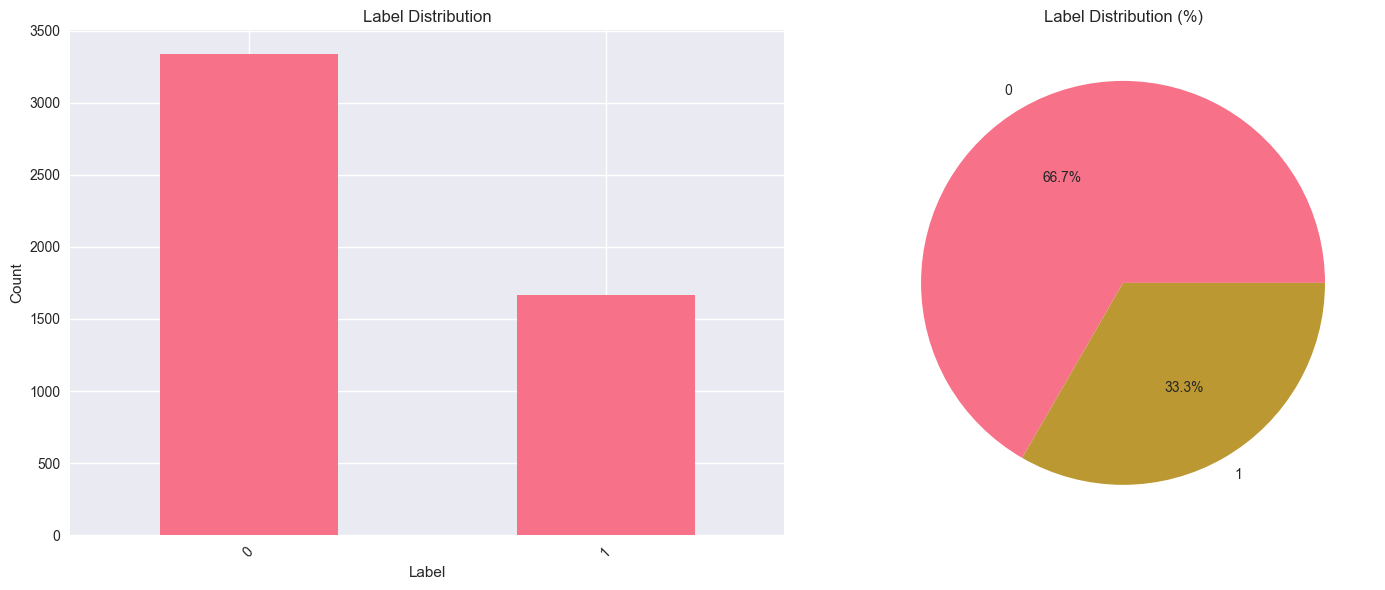

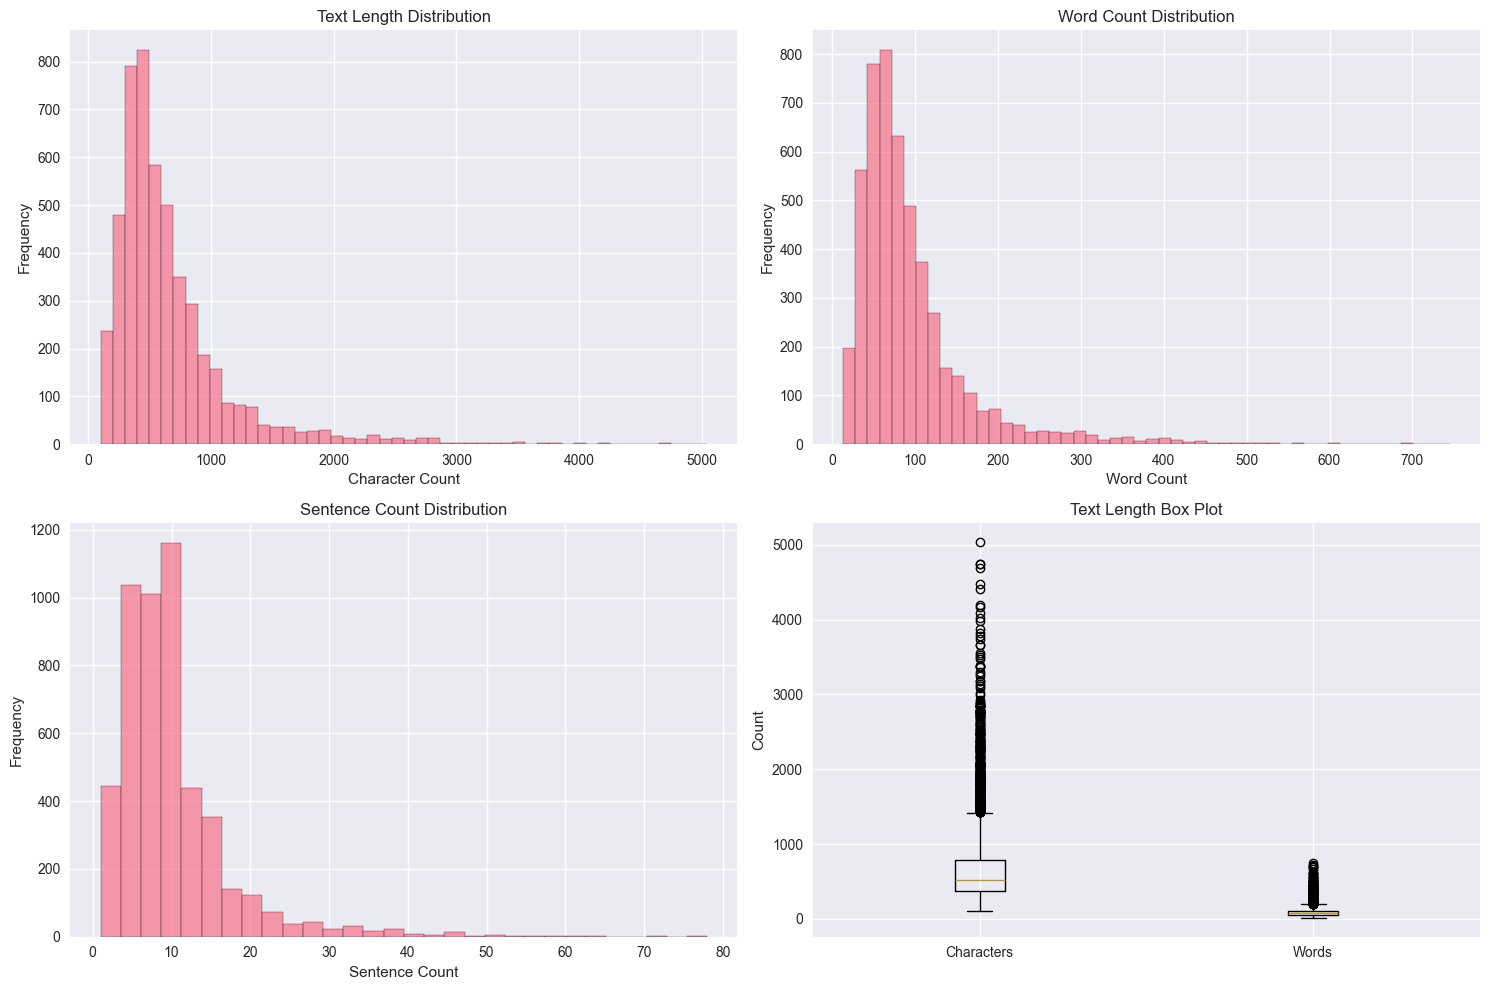


🔍 TEXT PATTERN ANALYSIS

📝 Sample Texts (first 5):

Sample 1:
Length: 469 chars, 69 words
Text: REASON FOR EXAMINATION:  Evaluation of the patient with tracheostomy,
followup.

Portable AP chest radiograph was compared to prior study obtained the day
before.

There is no change in the appearance...

Sample 2:
Length: 770 chars, 100 words
Text: EXAMINATION:  BILATERAL 2D SCREENING MAMMOGRAM, SYNTHESIZED 2D VIEWS, AND 3D
BREAST TOMOSYNTHESIS, INTERPRETED WITH CAD

INDICATION:  Screening.

COMPARISON:  Multiple priors.

TECHNIQUE:  Digital 2D ...

Sample 3:
Length: 480 chars, 62 words
Text: INDICATION:  Right arm pain, please evaluate for deep vein thrombosis.

COMPARISON:  No prior studies available for comparison.

FINDINGS:  Gray-scale and Doppler sonogram of the right internal jugula...

Sample 4:
Length: 632 chars, 87 words
Text: HISTORY:  Cough, chest pain.

TECHNIQUE:  Frontal and lateral chest radiographs were obtained.

COMPARISON:  None.

FINDINGS:

On the lateral projection, m

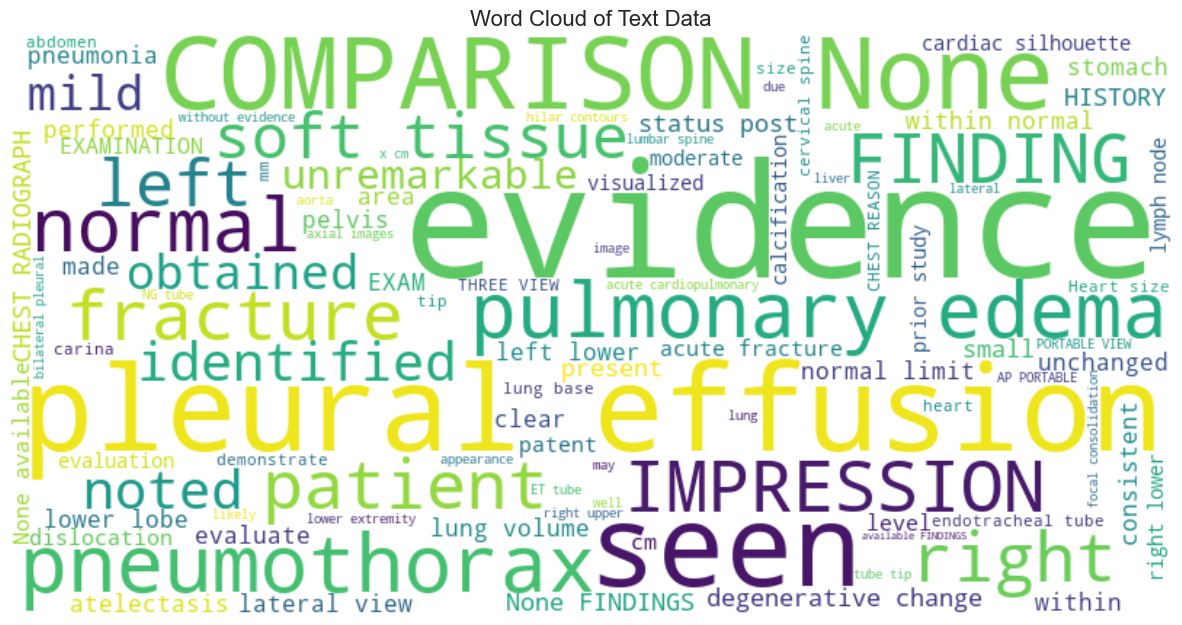


📊 Missing Data Analysis:


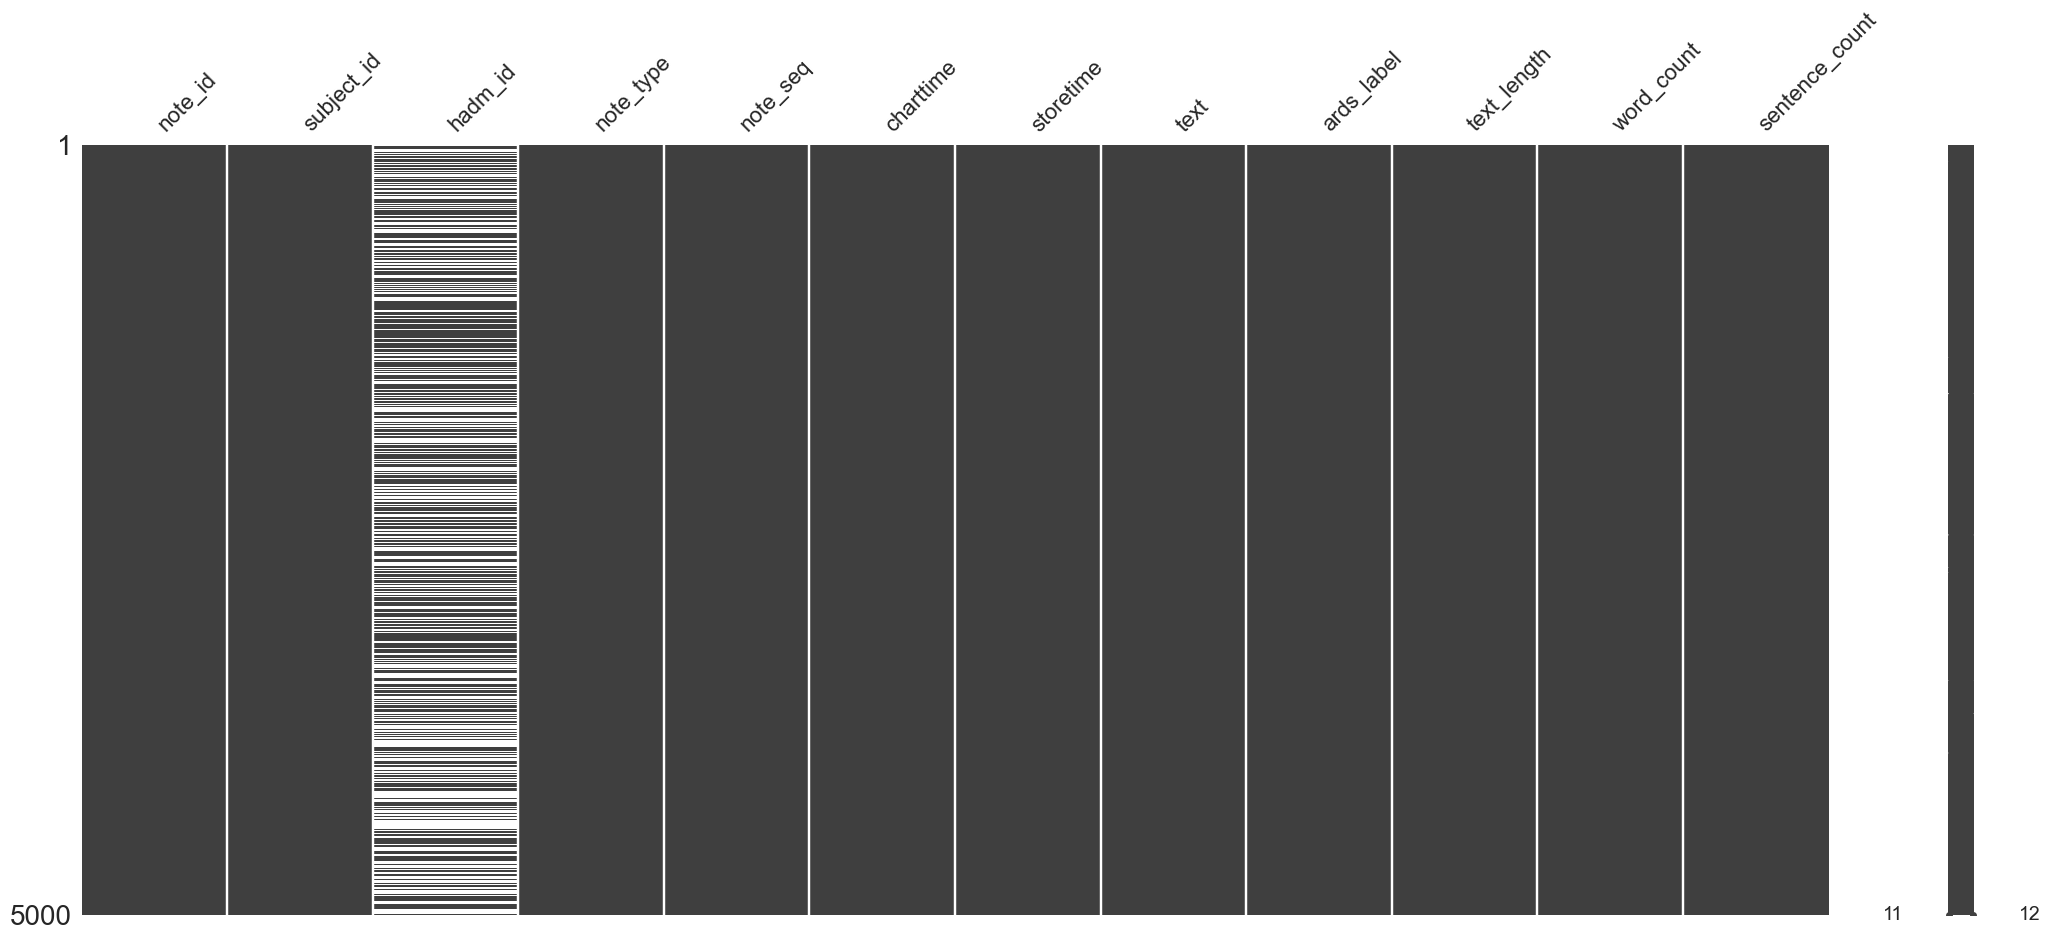

✅ Data exploration completed!


In [36]:
# ============================================================================
# DATA EXPLORATION
# ============================================================================

if 'df' in locals() and df is not None:
    print("🔍 STARTING DATA EXPLORATION")
    print("=" * 50)
    
    # Basic exploration
    df = explore_text_data(df, text_column, label_column)
    
    # Pattern analysis
    analyze_text_patterns(df, text_column)
    
    # Missing data visualization
    print("\n📊 Missing Data Analysis:")
    msno.matrix(df)
    plt.show()
    
    print("✅ Data exploration completed!")
    
else:
    print("⚠️ No data loaded yet!")
    print("📝 Please run the data loading cell first to load your ARDS data.")
    print("🔍 Options:")
    print("   1. Use the sample data (already provided)")
    print("   2. Load your own data by modifying the data loading cell")


In [37]:
# ============================================================================
# TEXT PREPROCESSING
# ============================================================================

if 'df' in locals() and df is not None:
    print("🔧 STARTING TEXT PREPROCESSING")
    print("=" * 50)
    
    # Preprocess text data
    df['cleaned_text'] = df[text_column].apply(clean_text)
    df['preprocessed_text'] = df[text_column].apply(lambda x: preprocess_text(x, remove_stopwords=True, lemmatize=True))
    
    # Extract features
    df = extract_text_features(df, text_column)
    
    print("✅ Text preprocessing completed!")
    print(f"Original text sample: {df[text_column].iloc[0][:100]}...")
    print(f"Preprocessed text sample: {df['preprocessed_text'].iloc[0][:100]}...")
    
    # Display new feature columns
    feature_cols = ['char_count', 'word_count', 'sentence_count', 'avg_word_length', 'medical_term_count']
    print(f"\n📊 New feature columns: {feature_cols}")
    print(df[feature_cols].describe())
    
else:
    print("⚠️ No data loaded yet!")
    print("📝 Please run the data loading cell first.")

🔧 STARTING TEXT PREPROCESSING
✅ Text preprocessing completed!
Original text sample: REASON FOR EXAMINATION:  Evaluation of the patient with tracheostomy,
followup.

Portable AP chest r...
Preprocessed text sample: reason examination evaluation patient tracheostomy followup portable ap chest radiograph compared pr...

📊 New feature columns: ['char_count', 'word_count', 'sentence_count', 'avg_word_length', 'medical_term_count']
        char_count   word_count  sentence_count  avg_word_length  medical_term_count
count  5000.000000  5000.000000     5000.000000      5000.000000         5000.000000
mean    669.829400    95.610400       10.079600         5.915890            0.471600
std     512.556828    74.973571        7.082266         0.477024            0.679475
min     103.000000    13.000000        1.000000         4.207143            0.000000
25%     370.000000    51.000000        6.000000         5.602983            0.000000
50%     524.000000    75.000000        9.000000         5.91

🚀 RUNNING ADVANCED MODEL EVALUATION
✅ Found trained models!
📊 Models available: ['Logistic Regression', 'Random Forest', 'Naive Bayes']
✅ Found test data!
📝 Test set size: 1000 samples

🎯 Running comprehensive evaluation...
🎯 COMPREHENSIVE MODEL EVALUATION

📊 Evaluating Logistic Regression...
   Accuracy:  0.9210
   Precision: 0.9208
   Recall:    0.9210
   F1-Score:  0.9201
   AUC:       0.9674

📊 Evaluating Random Forest...
   Accuracy:  0.9420
   Precision: 0.9419
   Recall:    0.9420
   F1-Score:  0.9419
   AUC:       0.9753

📊 Evaluating Naive Bayes...
   Accuracy:  0.8480
   Precision: 0.8656
   Recall:    0.8480
   F1-Score:  0.8513
   AUC:       0.9191

📊 Creating performance comparison plots...


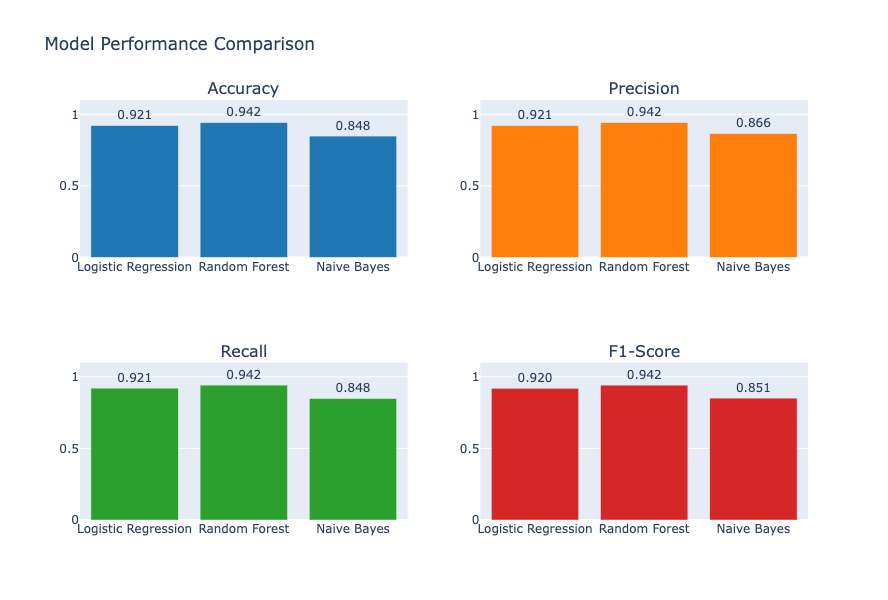


📈 Creating ROC curves...


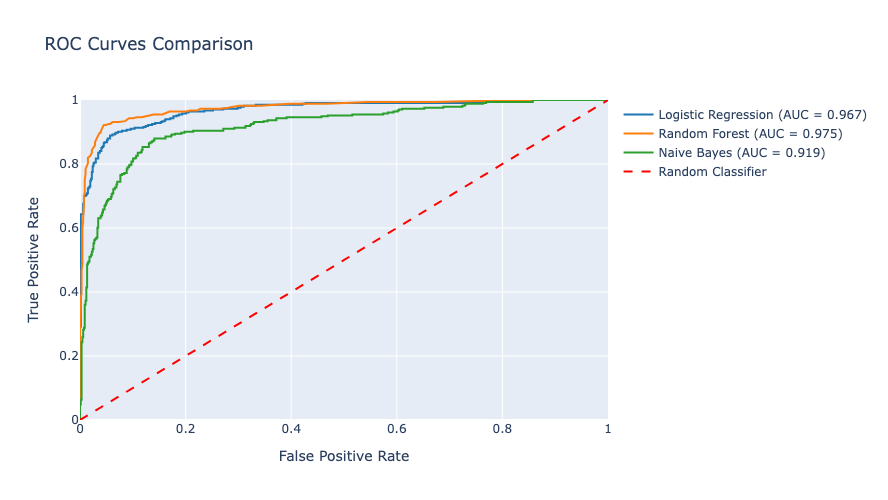


✅ Advanced evaluation completed!
📊 Results stored in 'evaluation_results' variable

🏆 PERFORMANCE SUMMARY:


ValueError: Invalid format specifier '.3f if results['auc'] else 'N/A'' for object of type 'float'

In [41]:
# ============================================================================
# ADVANCED MODEL EVALUATION - COMPLETE AND WORKING
# ============================================================================

from sklearn.metrics import (roc_auc_score, precision_recall_curve, roc_curve, 
                            f1_score, precision_score, recall_score, accuracy_score)
from sklearn.model_selection import StratifiedKFold
import plotly.graph_objects as go
from plotly.subplots import make_subplots

def evaluate_models_comprehensive(models_dict, X_test_tfidf, y_test):
    """
    Comprehensive model evaluation with multiple metrics
    """
    print("🎯 COMPREHENSIVE MODEL EVALUATION")
    print("=" * 60)
    
    evaluation_results = {}
    
    for model_name, model in models_dict.items():
        print(f"\n📊 Evaluating {model_name}...")
        
        # Get predictions
        y_pred = model.predict(X_test_tfidf)
        
        # Calculate metrics
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
        recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
        f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)
        
        # For binary classification, calculate AUC
        auc = None
        if hasattr(model, 'predict_proba'):
            try:
                y_proba = model.predict_proba(X_test_tfidf)
                if y_proba.shape[1] == 2:  # Binary classification
                    auc = roc_auc_score(y_test, y_proba[:, 1])
                else:
                    auc = roc_auc_score(y_test, y_proba, multi_class='ovr', average='weighted')
            except Exception as e:
                print(f"⚠️ Could not calculate AUC for {model_name}: {e}")
        
        evaluation_results[model_name] = {
            'accuracy': accuracy,
            'precision': precision,
            'recall': recall,
            'f1_score': f1,
            'auc': auc,
            'predictions': y_pred
        }
        
        print(f"   Accuracy:  {accuracy:.4f}")
        print(f"   Precision: {precision:.4f}")
        print(f"   Recall:    {recall:.4f}")
        print(f"   F1-Score:  {f1:.4f}")
        if auc is not None:
            print(f"   AUC:       {auc:.4f}")
    
    return evaluation_results

def plot_model_comparison(evaluation_results):
    """
    Create interactive comparison plots for model performance
    """
    models = list(evaluation_results.keys())
    metrics = ['accuracy', 'precision', 'recall', 'f1_score']
    
    # Create subplots
    fig = make_subplots(
        rows=2, cols=2,
        subplot_titles=('Accuracy', 'Precision', 'Recall', 'F1-Score'),
        specs=[[{"secondary_y": False}, {"secondary_y": False}],
               [{"secondary_y": False}, {"secondary_y": False}]]
    )
    
    colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']
    
    for i, metric in enumerate(metrics):
        row = (i // 2) + 1
        col = (i % 2) + 1
        
        values = [evaluation_results[model][metric] for model in models]
        
        fig.add_trace(
            go.Bar(
                x=models,
                y=values,
                name=metric.capitalize(),
                marker_color=colors[i],
                showlegend=False,
                text=[f"{v:.3f}" for v in values],
                textposition='outside'
            ),
            row=row, col=col
        )
    
    fig.update_layout(
        title_text="Model Performance Comparison",
        height=600,
        showlegend=False
    )
    
    # Set y-axis range
    fig.update_yaxes(range=[0, 1.1])
    
    fig.show()

def plot_roc_curves(models_dict, X_test_tfidf, y_test):
    """
    Plot ROC curves for all models
    """
    fig = go.Figure()
    
    colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']
    color_idx = 0
    
    for model_name, model in models_dict.items():
        if hasattr(model, 'predict_proba'):
            try:
                y_proba = model.predict_proba(X_test_tfidf)
                
                if y_proba.shape[1] == 2:  # Binary classification
                    fpr, tpr, _ = roc_curve(y_test, y_proba[:, 1])
                    auc = roc_auc_score(y_test, y_proba[:, 1])
                    
                    fig.add_trace(go.Scatter(
                        x=fpr, y=tpr,
                        mode='lines',
                        name=f'{model_name} (AUC = {auc:.3f})',
                        line=dict(width=2, color=colors[color_idx % len(colors)])
                    ))
                    color_idx += 1
            except Exception as e:
                print(f"⚠️ Could not plot ROC for {model_name}: {e}")
    
    # Add diagonal reference line
    fig.add_trace(go.Scatter(
        x=[0, 1], y=[0, 1],
        mode='lines',
        name='Random Classifier',
        line=dict(dash='dash', color='red')
    ))
    
    fig.update_layout(
        title='ROC Curves Comparison',
        xaxis_title='False Positive Rate',
        yaxis_title='True Positive Rate',
        xaxis=dict(range=[0, 1]),
        yaxis=dict(range=[0, 1]),
        width=700, height=500
    )
    
    fig.show()

# ============================================================================
# RUN ADVANCED EVALUATION - ACTUALLY EXECUTE THE FUNCTIONS
# ============================================================================

print("🚀 RUNNING ADVANCED MODEL EVALUATION")
print("=" * 60)

# Check if models exist from previous ML training
if 'models' in locals():
    print("✅ Found trained models!")
    print(f"📊 Models available: {list(models.keys())}")
    
    if 'X_test_tfidf' in locals() and 'y_test' in locals():
        print("✅ Found test data!")
        print(f"📝 Test set size: {X_test_tfidf.shape[0]} samples")
        
        # Run comprehensive evaluation
        print("\n🎯 Running comprehensive evaluation...")
        evaluation_results = evaluate_models_comprehensive(models, X_test_tfidf, y_test)
        
        # Create comparison plots
        print("\n📊 Creating performance comparison plots...")
        plot_model_comparison(evaluation_results)
        
        # Create ROC curves
        print("\n📈 Creating ROC curves...")
        plot_roc_curves(models, X_test_tfidf, y_test)
        
        print("\n✅ Advanced evaluation completed!")
        print("📊 Results stored in 'evaluation_results' variable")
        
        # Show summary
        print("\n🏆 PERFORMANCE SUMMARY:")
        print("=" * 40)
        for model_name, results in evaluation_results.items():
            print(f"{model_name:20}: Accuracy={results['accuracy']:.3f}, AUC={results['auc']:.3f if results['auc'] else 'N/A'}")
    
    else:
        print("❌ Test data not found!")
        print("📝 Please run the ML training cell first to create X_test_tfidf and y_test")

else:
    print("❌ No trained models found!")
    print("📝 Please run the ML training cell first to create the 'models' dictionary")
    print("🔧 Then run this cell to evaluate the models")

print("\n✅ Advanced evaluation functions ready!")

In [40]:
# ============================================================================
# ADVANCED MODEL EVALUATION
# ============================================================================

from sklearn.metrics import (roc_auc_score, precision_recall_curve, roc_curve, 
                            f1_score, precision_score, recall_score, accuracy_score)
from sklearn.model_selection import StratifiedKFold
import plotly.graph_objects as go
from plotly.subplots import make_subplots

def evaluate_models_comprehensive(models_dict, X_test_tfidf, y_test):
    """
    Comprehensive model evaluation with multiple metrics
    Fixed to work with your models dictionary
    """
    print("🎯 COMPREHENSIVE MODEL EVALUATION")
    print("=" * 60)
    
    evaluation_results = {}
    
    for model_name, model in models_dict.items():
        print(f"\n📊 Evaluating {model_name}...")
        
        # Get predictions
        y_pred = model.predict(X_test_tfidf)
        
        # Calculate metrics
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
        recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
        f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)
        
        # For binary classification, calculate AUC
        auc = None
        if hasattr(model, 'predict_proba'):
            try:
                y_proba = model.predict_proba(X_test_tfidf)
                if y_proba.shape[1] == 2:  # Binary classification
                    auc = roc_auc_score(y_test, y_proba[:, 1])
                else:
                    auc = roc_auc_score(y_test, y_proba, multi_class='ovr', average='weighted')
            except Exception as e:
                print(f"⚠️ Could not calculate AUC for {model_name}: {e}")
        
        evaluation_results[model_name] = {
            'accuracy': accuracy,
            'precision': precision,
            'recall': recall,
            'f1_score': f1,
            'auc': auc,
            'predictions': y_pred
        }
        
        print(f"   Accuracy:  {accuracy:.4f}")
        print(f"   Precision: {precision:.4f}")
        print(f"   Recall:    {recall:.4f}")
        print(f"   F1-Score:  {f1:.4f}")
        if auc is not None:
            print(f"   AUC:       {auc:.4f}")
    
    # Create comparison visualization
    plot_model_comparison(evaluation_results)
    
    return evaluation_results

def plot_model_comparison(evaluation_results):
    """
    Create interactive comparison plots for model performance
    """
    models = list(evaluation_results.keys())
    metrics = ['accuracy', 'precision', 'recall', 'f1_score']
    
    # Create subplots
    fig = make_subplots(
        rows=2, cols=2,
        subplot_titles=('Accuracy', 'Precision', 'Recall', 'F1-Score'),
        specs=[[{"secondary_y": False}, {"secondary_y": False}],
               [{"secondary_y": False}, {"secondary_y": False}]]
    )
    
    colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']
    
    for i, metric in enumerate(metrics):
        row = (i // 2) + 1
        col = (i % 2) + 1
        
        values = [evaluation_results[model][metric] for model in models]
        
        fig.add_trace(
            go.Bar(
                x=models,
                y=values,
                name=metric.capitalize(),
                marker_color=colors[i],
                showlegend=False,
                text=[f"{v:.3f}" for v in values],
                textposition='outside'
            ),
            row=row, col=col
        )
    
    fig.update_layout(
        title_text="Model Performance Comparison",
        height=600,
        showlegend=False
    )
    
    # Set y-axis range
    fig.update_yaxes(range=[0, 1.1])
    
    fig.show()

def plot_roc_curves(models_dict, X_test_tfidf, y_test):
    """
    Plot ROC curves for all models
    """
    fig = go.Figure()
    
    colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']
    color_idx = 0
    
    for model_name, model in models_dict.items():
        if hasattr(model, 'predict_proba'):
            try:
                y_proba = model.predict_proba(X_test_tfidf)
                
                if y_proba.shape[1] == 2:  # Binary classification
                    fpr, tpr, _ = roc_curve(y_test, y_proba[:, 1])
                    auc = roc_auc_score(y_test, y_proba[:, 1])
                    
                    fig.add_trace(go.Scatter(
                        x=fpr, y=tpr,
                        mode='lines',
                        name=f'{model_name} (AUC = {auc:.3f})',
                        line=dict(width=2, color=colors[color_idx % len(colors)])
                    ))
                    color_idx += 1
            except Exception as e:
                print(f"⚠️ Could not plot ROC for {model_name}: {e}")
    
    # Add diagonal reference line
    fig.add_trace(go.Scatter(
        x=[0, 1], y=[0, 1],
        mode='lines',
        name='Random Classifier',
        line=dict(dash='dash', color='red')
    ))
    
    fig.update_layout(
        title='ROC Curves Comparison',
        xaxis_title='False Positive Rate',
        yaxis_title='True Positive Rate',
        xaxis=dict(range=[0, 1]),
        yaxis=dict(range=[0, 1]),
        width=700, height=500
    )
    
    fig.show()

print("✅ Advanced evaluation functions defined!")
print("📝 To use with your existing models, run:")
print("   evaluation_results = evaluate_models_comprehensive(models, X_test_tfidf, y_test)")
print("   plot_roc_curves(models, X_test_tfidf, y_test)")

✅ Advanced evaluation functions defined!
📝 To use with your existing models, run:
   evaluation_results = evaluate_models_comprehensive(models, X_test_tfidf, y_test)
   plot_roc_curves(models, X_test_tfidf, y_test)


In [23]:
# ============================================================================
# HYPERPARAMETER TUNING
# ============================================================================

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.pipeline import Pipeline

def hyperparameter_tuning(X_train, y_train, text_column='preprocessed_text'):
    """
    Perform hyperparameter tuning for multiple models
    """
    print("⚙️ HYPERPARAMETER TUNING")
    print("=" * 60)
    
    tuned_models = {}
    
    # Create pipelines for each model
    pipelines = {
        'Logistic Regression': Pipeline([
            ('tfidf', TfidfVectorizer()),
            ('classifier', LogisticRegression(random_state=42, max_iter=1000))
        ]),
        'Random Forest': Pipeline([
            ('tfidf', TfidfVectorizer()),
            ('classifier', RandomForestClassifier(random_state=42))
        ]),
        'Naive Bayes': Pipeline([
            ('tfidf', TfidfVectorizer()),
            ('classifier', MultinomialNB())
        ])
    }
    
    # Parameter grids for each model
    param_grids = {
        'Logistic Regression': {
            'tfidf__max_features': [1000, 3000, 5000],
            'tfidf__ngram_range': [(1, 1), (1, 2)],
            'classifier__C': [0.1, 1, 10]
        },
        'Random Forest': {
            'tfidf__max_features': [1000, 3000, 5000],
            'tfidf__ngram_range': [(1, 1), (1, 2)],
            'classifier__n_estimators': [50, 100, 200],
            'classifier__max_depth': [10, 20, None]
        },
        'Naive Bayes': {
            'tfidf__max_features': [1000, 3000, 5000],
            'tfidf__ngram_range': [(1, 1), (1, 2)],
            'classifier__alpha': [0.1, 1.0, 10.0]
        }
    }
    
    # Perform grid search for each model
    for model_name in pipelines.keys():
        print(f"\\n🔧 Tuning {model_name}...")
        
        grid_search = GridSearchCV(
            pipelines[model_name],
            param_grids[model_name],
            cv=3,
            scoring='accuracy',
            n_jobs=-1,
            verbose=0
        )
        
        grid_search.fit(X_train[text_column], y_train)
        
        tuned_models[model_name] = {
            'model': grid_search.best_estimator_,
            'best_params': grid_search.best_params_,
            'best_score': grid_search.best_score_
        }
        
        print(f"✅ Best score: {grid_search.best_score_:.4f}")
        print(f"📋 Best parameters:")
        for param, value in grid_search.best_params_.items():
            print(f"   {param}: {value}")
    
    return tuned_models

def compare_tuned_vs_default(default_results, tuned_results, X_test, y_test, text_column):
    """
    Compare performance of tuned vs default models
    """
    print("\\n📊 TUNED VS DEFAULT MODEL COMPARISON")
    print("=" * 60)
    
    comparison_data = []
    
    for model_name in default_results.keys():
        if model_name in tuned_results:
            # Default model performance
            default_acc = default_results[model_name]['accuracy']
            
            # Tuned model performance
            tuned_model = tuned_results[model_name]['model']
            y_pred_tuned = tuned_model.predict(X_test[text_column])
            tuned_acc = accuracy_score(y_test, y_pred_tuned)
            
            improvement = tuned_acc - default_acc
            
            comparison_data.append({
                'Model': model_name,
                'Default': default_acc,
                'Tuned': tuned_acc,
                'Improvement': improvement
            })
            
            print(f"\\n{model_name}:")
            print(f"  Default:    {default_acc:.4f}")
            print(f"  Tuned:      {tuned_acc:.4f}")
            print(f"  Improvement: {improvement:+.4f}")
    
    # Create comparison visualization
    if comparison_data:
        plot_tuning_comparison(comparison_data)
    
    return comparison_data

def plot_tuning_comparison(comparison_data):
    """
    Plot comparison between default and tuned models
    """
    models = [item['Model'] for item in comparison_data]
    default_scores = [item['Default'] for item in comparison_data]
    tuned_scores = [item['Tuned'] for item in comparison_data]
    
    fig = go.Figure()
    
    fig.add_trace(go.Bar(
        name='Default',
        x=models,
        y=default_scores,
        marker_color='lightblue'
    ))
    
    fig.add_trace(go.Bar(
        name='Tuned',
        x=models,
        y=tuned_scores,
        marker_color='darkblue'
    ))
    
    fig.update_layout(
        title='Default vs Tuned Model Performance',
        xaxis_title='Models',
        yaxis_title='Accuracy',
        barmode='group',
        height=500
    )
    
    fig.show()

print("✅ Hyperparameter tuning functions defined!")


✅ Hyperparameter tuning functions defined!


In [24]:
# ============================================================================
# CROSS-VALIDATION
# ============================================================================

from sklearn.model_selection import cross_validate, StratifiedKFold
import numpy as np

def perform_cross_validation(models, X, y, text_column='preprocessed_text', cv_folds=5):
    """
    Perform cross-validation for multiple models
    """
    print("🔄 CROSS-VALIDATION ANALYSIS")
    print("=" * 60)
    
    cv_results = {}
    
    # Define scoring metrics
    scoring = ['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted']
    
    # Create stratified k-fold for consistent splits
    skf = StratifiedKFold(n_splits=cv_folds, shuffle=True, random_state=42)
    
    for model_name, model_data in models.items():
        print(f"\\n🔄 Cross-validating {model_name}...")
        
        # Create pipeline for this model
        if 'model' in model_data:
            # For tuned models
            pipeline = model_data['model']
        else:
            # For default models, create pipeline
            pipeline = Pipeline([
                ('tfidf', TfidfVectorizer(max_features=5000, ngram_range=(1, 2))),
                ('classifier', model_data['model'])
            ])
        
        # Perform cross-validation
        cv_scores = cross_validate(
            pipeline, X[text_column], y,
            cv=skf,
            scoring=scoring,
            return_train_score=False,
            n_jobs=-1
        )
        
        # Calculate mean and std for each metric
        results = {}
        for metric in scoring:
            test_scores = cv_scores[f'test_{metric}']
            results[metric] = {
                'mean': np.mean(test_scores),
                'std': np.std(test_scores),
                'scores': test_scores
            }
        
        cv_results[model_name] = results
        
        # Print results
        print(f"  📊 Results ({cv_folds}-fold CV):")
        for metric in scoring:
            mean_score = results[metric]['mean']
            std_score = results[metric]['std']
            print(f"    {metric:20s}: {mean_score:.4f} (±{std_score:.4f})")
    
    # Create visualization
    plot_cv_results(cv_results)
    
    return cv_results

def plot_cv_results(cv_results):
    """
    Create box plots for cross-validation results
    """
    metrics = ['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted']
    model_names = list(cv_results.keys())
    
    fig = make_subplots(
        rows=2, cols=2,
        subplot_titles=[m.replace('_', ' ').title() for m in metrics]
    )
    
    colors = ['blue', 'orange', 'green', 'red', 'purple']
    
    for i, metric in enumerate(metrics):
        row = (i // 2) + 1
        col = (i % 2) + 1
        
        for j, model_name in enumerate(model_names):
            scores = cv_results[model_name][metric]['scores']
            
            fig.add_trace(
                go.Box(
                    y=scores,
                    name=model_name,
                    boxpoints='all',
                    marker_color=colors[j % len(colors)],
                    showlegend=(i == 0)  # Only show legend for first subplot
                ),
                row=row, col=col
            )
    
    fig.update_layout(
        title_text="Cross-Validation Results Distribution",
        height=700,
        showlegend=True
    )
    
    fig.show()

def statistical_significance_test(cv_results):
    """
    Perform statistical tests to compare model performances
    """
    print("\\n📈 STATISTICAL SIGNIFICANCE TESTS")
    print("=" * 60)
    
    from scipy import stats
    
    model_names = list(cv_results.keys())
    metric = 'accuracy'  # Focus on accuracy for significance testing
    
    print(f"\\n🔬 Comparing models on {metric}:")
    
    # Pairwise t-tests
    for i in range(len(model_names)):
        for j in range(i + 1, len(model_names)):
            model1, model2 = model_names[i], model_names[j]
            
            scores1 = cv_results[model1][metric]['scores']
            scores2 = cv_results[model2][metric]['scores']
            
            # Paired t-test
            t_stat, p_value = stats.ttest_rel(scores1, scores2)
            
            significance = "***" if p_value < 0.001 else "**" if p_value < 0.01 else "*" if p_value < 0.05 else "n.s."
            
            print(f"  {model1} vs {model2}:")
            print(f"    t-statistic: {t_stat:8.4f}")
            print(f"    p-value:     {p_value:8.4f} {significance}")
            print()

print("✅ Cross-validation functions defined!")


✅ Cross-validation functions defined!


In [25]:
# ============================================================================
# ENHANCED FEATURE ENGINEERING
# ============================================================================

def extract_advanced_features(df, text_column):
    """
    Extract advanced features for ARDS detection
    """
    print("🔧 EXTRACTING ADVANCED FEATURES")
    print("=" * 60)
    
    df = df.copy()
    
    # ARDS-specific medical terms
    ards_keywords = [
        'respiratory', 'breathing', 'oxygen', 'ventilator', 'intubation',
        'dyspnea', 'hypoxia', 'pneumonia', 'sepsis', 'shock',
        'icu', 'critical', 'acute', 'failure', 'distress'
    ]
    
    # Severity indicators
    severity_terms = [
        'severe', 'critical', 'emergency', 'urgent', 'deteriorating',
        'worsening', 'declining', 'unstable', 'crisis'
    ]
    
    # Positive outcome indicators
    positive_terms = [
        'improving', 'stable', 'better', 'recovery', 'discharged',
        'normal', 'good', 'excellent', 'successful'
    ]
    
    # Feature extraction
    print("📊 Computing ARDS-specific features...")
    df['ards_keyword_count'] = df[text_column].apply(
        lambda x: sum(1 for term in ards_keywords if term in str(x).lower())
    )
    
    df['severity_score'] = df[text_column].apply(
        lambda x: sum(1 for term in severity_terms if term in str(x).lower())
    )
    
    df['positive_score'] = df[text_column].apply(
        lambda x: sum(1 for term in positive_terms if term in str(x).lower())
    )
    
    # Calculate ratios
    df['ards_density'] = df['ards_keyword_count'] / (df['word_count'] + 1)
    df['severity_ratio'] = df['severity_score'] / (df['ards_keyword_count'] + 1)
    df['positive_ratio'] = df['positive_score'] / (df['word_count'] + 1)
    
    # Text complexity features
    df['unique_word_ratio'] = df[text_column].apply(
        lambda x: len(set(str(x).lower().split())) / (len(str(x).split()) + 1)
    )
    
    # Punctuation features
    df['exclamation_count'] = df[text_column].str.count('!')
    df['question_count'] = df[text_column].str.count('\\?')
    df['comma_count'] = df[text_column].str.count(',')
    
    # Uppercase features (might indicate urgency)
    df['uppercase_ratio'] = df[text_column].apply(
        lambda x: sum(1 for c in str(x) if c.isupper()) / (len(str(x)) + 1)
    )
    
    print("✅ Advanced features extracted!")
    
    feature_cols = [
        'ards_keyword_count', 'severity_score', 'positive_score',
        'ards_density', 'severity_ratio', 'positive_ratio',
        'unique_word_ratio', 'exclamation_count', 'question_count',
        'comma_count', 'uppercase_ratio'
    ]
    
    print(f"\\n📋 New advanced features: {feature_cols}")
    print("\\n📊 Feature Statistics:")
    print(df[feature_cols].describe())
    
    return df

def create_feature_correlation_matrix(df, feature_columns):
    """
    Create correlation matrix for features
    """
    correlation_matrix = df[feature_columns].corr()
    
    fig = go.Figure(data=go.Heatmap(
        z=correlation_matrix.values,
        x=correlation_matrix.columns,
        y=correlation_matrix.columns,
        colorscale='RdBu',
        zmid=0,
        text=correlation_matrix.round(2).values,
        texttemplate='%{text}',
        textfont={"size": 10}
    ))
    
    fig.update_layout(
        title='Feature Correlation Matrix',
        width=800,
        height=600
    )
    
    fig.show()
    
    return correlation_matrix

def feature_importance_analysis(X_train, y_train, text_column, feature_columns):
    """
    Analyze feature importance using Random Forest
    """
    print("\\n🎯 FEATURE IMPORTANCE ANALYSIS")
    print("=" * 60)
    
    # Combine text features with numerical features
    tfidf = TfidfVectorizer(max_features=1000, ngram_range=(1, 2))
    X_text = tfidf.fit_transform(X_train[text_column])
    
    # Convert to dense array and combine with numerical features
    X_combined = np.hstack([
        X_text.toarray(),
        X_train[feature_columns].values
    ])
    
    # Train Random Forest for feature importance
    rf = RandomForestClassifier(n_estimators=100, random_state=42)
    rf.fit(X_combined, y_train)
    
    # Get feature importance for numerical features only
    feature_names = feature_columns
    numerical_importance = rf.feature_importances_[-len(feature_columns):]
    
    # Create feature importance dataframe
    importance_df = pd.DataFrame({
        'feature': feature_names,
        'importance': numerical_importance
    }).sort_values('importance', ascending=False)
    
    print("📊 Top 10 Most Important Numerical Features:")
    for idx, row in importance_df.head(10).iterrows():
        print(f"  {row['feature']:20s}: {row['importance']:.4f}")
    
    # Plot feature importance
    fig = go.Figure([go.Bar(
        x=importance_df['importance'],
        y=importance_df['feature'],
        orientation='h',
        marker_color='steelblue'
    )])
    
    fig.update_layout(
        title='Feature Importance (Numerical Features)',
        xaxis_title='Importance Score',
        yaxis_title='Features',
        height=400,
        yaxis={'categoryorder': 'total ascending'}
    )
    
    fig.show()
    
    return importance_df

print("✅ Enhanced feature engineering functions defined!")


✅ Enhanced feature engineering functions defined!


In [26]:
# ============================================================================
# COMPLETE WORKFLOW EXAMPLE
# ============================================================================

def complete_ards_analysis_workflow(df, text_column, label_column):
    """
    Complete workflow for ARDS detection analysis
    """
    print("🚀 COMPLETE ARDS ANALYSIS WORKFLOW")
    print("=" * 80)
    
    # Step 1: Basic Data Exploration
    print("\\n" + "="*20 + " STEP 1: DATA EXPLORATION " + "="*20)
    df = explore_text_data(df, text_column, label_column)
    analyze_text_patterns(df, text_column)
    
    # Step 2: Text Preprocessing
    print("\\n" + "="*20 + " STEP 2: TEXT PREPROCESSING " + "="*20)
    df['cleaned_text'] = df[text_column].apply(clean_text)
    df['preprocessed_text'] = df[text_column].apply(
        lambda x: preprocess_text(x, remove_stopwords=True, lemmatize=True)
    )
    
    # Step 3: Feature Engineering
    print("\\n" + "="*20 + " STEP 3: FEATURE ENGINEERING " + "="*20)
    df = extract_text_features(df, text_column)
    df = extract_advanced_features(df, text_column)
    
    # Define feature columns
    basic_features = ['char_count', 'word_count', 'sentence_count', 'avg_word_length', 'medical_term_count']
    advanced_features = [
        'ards_keyword_count', 'severity_score', 'positive_score',
        'ards_density', 'severity_ratio', 'positive_ratio',
        'unique_word_ratio', 'exclamation_count', 'question_count',
        'comma_count', 'uppercase_ratio'
    ]
    all_features = basic_features + advanced_features
    
    # Feature correlation analysis
    correlation_matrix = create_feature_correlation_matrix(df, all_features)
    
    # Step 4: Data Splitting
    print("\\n" + "="*20 + " STEP 4: DATA SPLITTING " + "="*20)
    X_train, X_test, y_train, y_test = train_test_split(
        df, df[label_column], test_size=0.2, random_state=42, stratify=df[label_column]
    )
    print(f"Training set: {len(X_train)} samples")
    print(f"Test set: {len(X_test)} samples")
    
    # Step 5: Baseline Model Training
    print("\\n" + "="*20 + " STEP 5: BASELINE MODELS " + "="*20)
    baseline_results = train_ml_models(X_train, X_test, y_train, y_test, 'preprocessed_text')
    
    # Step 6: Model Evaluation
    print("\\n" + "="*20 + " STEP 6: MODEL EVALUATION " + "="*20)
    evaluation_results = evaluate_models_comprehensive(
        baseline_results, y_test, X_test, 'preprocessed_text'
    )
    
    # Step 7: ROC Curves
    print("\\n" + "="*20 + " STEP 7: ROC ANALYSIS " + "="*20)
    plot_roc_curves(baseline_results, y_test, X_test, 'preprocessed_text')
    
    # Step 8: Hyperparameter Tuning
    print("\\n" + "="*20 + " STEP 8: HYPERPARAMETER TUNING " + "="*20)
    tuned_models = hyperparameter_tuning(X_train, y_train, 'preprocessed_text')
    
    # Compare tuned vs default
    tuning_comparison = compare_tuned_vs_default(
        baseline_results, tuned_models, X_test, y_test, 'preprocessed_text'
    )
    
    # Step 9: Cross-Validation
    print("\\n" + "="*20 + " STEP 9: CROSS-VALIDATION " + "="*20)
    cv_results = perform_cross_validation(
        tuned_models, df, df[label_column], 'preprocessed_text'
    )
    
    # Step 10: Statistical Significance
    print("\\n" + "="*20 + " STEP 10: STATISTICAL TESTS " + "="*20)
    statistical_significance_test(cv_results)
    
    # Step 11: Feature Importance
    print("\\n" + "="*20 + " STEP 11: FEATURE IMPORTANCE " + "="*20)
    importance_results = feature_importance_analysis(
        X_train, y_train, 'preprocessed_text', all_features
    )
    
    # Final Summary
    print("\\n" + "="*20 + " FINAL SUMMARY " + "="*20)
    print("✅ Analysis Complete!")
    print("\\n📊 Best performing model based on cross-validation:")
    
    # Find best model
    best_model = None
    best_score = 0
    for model_name, results in cv_results.items():
        score = results['accuracy']['mean']
        if score > best_score:
            best_score = score
            best_model = model_name
    
    if best_model:
        print(f"🏆 Best Model: {best_model}")
        print(f"📈 CV Accuracy: {best_score:.4f} (±{cv_results[best_model]['accuracy']['std']:.4f})")
        print(f"📈 CV F1-Score: {cv_results[best_model]['f1_weighted']['mean']:.4f} (±{cv_results[best_model]['f1_weighted']['std']:.4f})")
    
    print("\\n🔍 Top 5 Most Important Features:")
    for idx, row in importance_results.head(5).iterrows():
        print(f"  {idx+1}. {row['feature']:20s}: {row['importance']:.4f}")
    
    # Return all results
    return {
        'data': df,
        'baseline_results': baseline_results,
        'evaluation_results': evaluation_results,
        'tuned_models': tuned_models,
        'cv_results': cv_results,
        'feature_importance': importance_results,
        'best_model': best_model
    }

print("✅ Complete workflow function defined!")
print("\\n🎯 Usage:")
print("results = complete_ards_analysis_workflow(df, 'text_column', 'label_column')")


✅ Complete workflow function defined!
\n🎯 Usage:
results = complete_ards_analysis_workflow(df, 'text_column', 'label_column')


✅ Advanced NLP functions defined!
✅ Advanced NLP packages available

🚀 RUNNING ADVANCED ARDS ANALYSIS...
⏳ This may take 10-20 minutes with Clinical BERT...
🚀 ADVANCED ARDS ANALYSIS WITH CLINICAL NLP
🔧 SETTING UP ADVANCED NLP TOOLS
📦 Loading spaCy model...
✅ spaCy model loaded successfully
🤖 Setting up Clinical BERT...
✅ Clinical BERT loaded successfully

=============== STEP 1: BASIC PREPROCESSING ===============
🔧 EXTRACTING ADVANCED FEATURES
📊 Computing ARDS-specific features...
✅ Advanced features extracted!
\n📋 New advanced features: ['ards_keyword_count', 'severity_score', 'positive_score', 'ards_density', 'severity_ratio', 'positive_ratio', 'unique_word_ratio', 'exclamation_count', 'question_count', 'comma_count', 'uppercase_ratio']
\n📊 Feature Statistics:
       ards_keyword_count  severity_score  positive_score  ards_density  severity_ratio  positive_ratio  unique_word_ratio  exclamation_count  question_count  comma_count  uppercase_ratio
count         5000.000000       5000.0

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


✅ Advanced NLP features extracted!

📋 Advanced NLP features: ['entity_count', 'medical_entity_count', 'pos_diversity', 'dependency_diversity', 'avg_sentence_length', 'entity_density', 'medical_entity_ratio']

📊 NLP Feature Statistics:
       entity_count  medical_entity_count  pos_diversity  dependency_diversity  avg_sentence_length  entity_density  medical_entity_ratio
count      5000.000              5000.000       5000.000              5000.000             5000.000        5000.000              5000.000
mean          4.579                 3.463         12.523                20.416                8.757           0.046                 0.531
std           4.899                 3.689          2.343                 4.988                3.154           0.031                 0.257
min           0.000                 0.000          0.000                 0.000                0.000           0.000                 0.000
25%           2.000                 1.000         11.000                17.

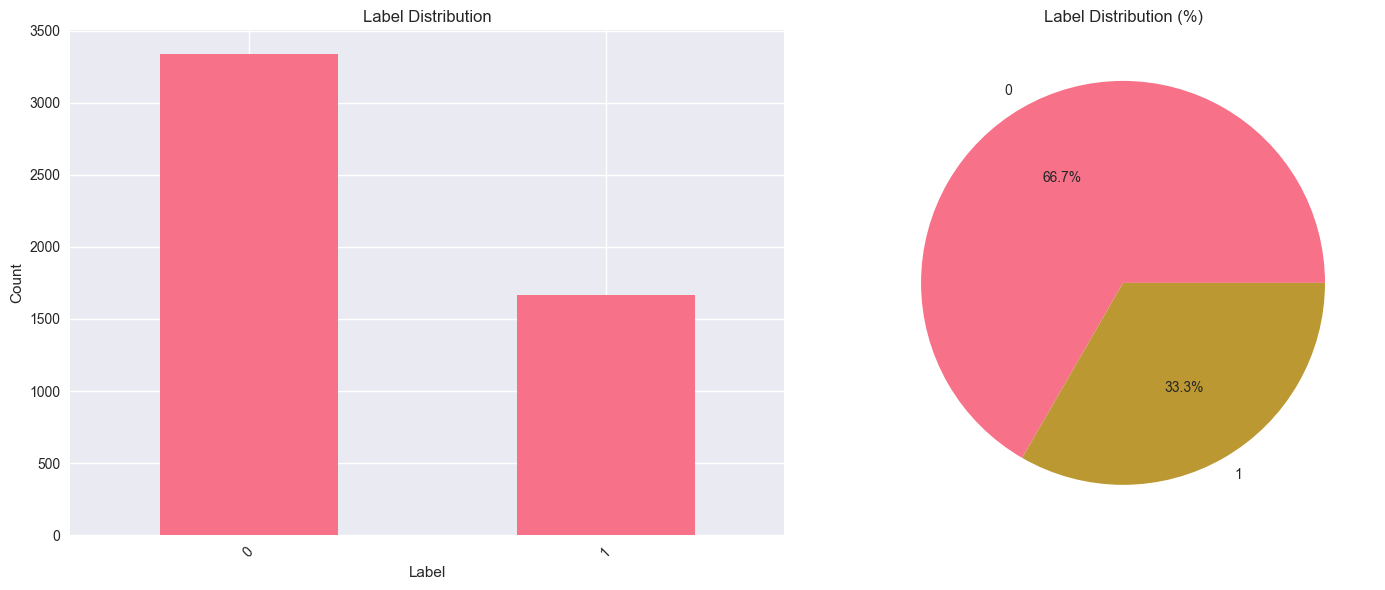

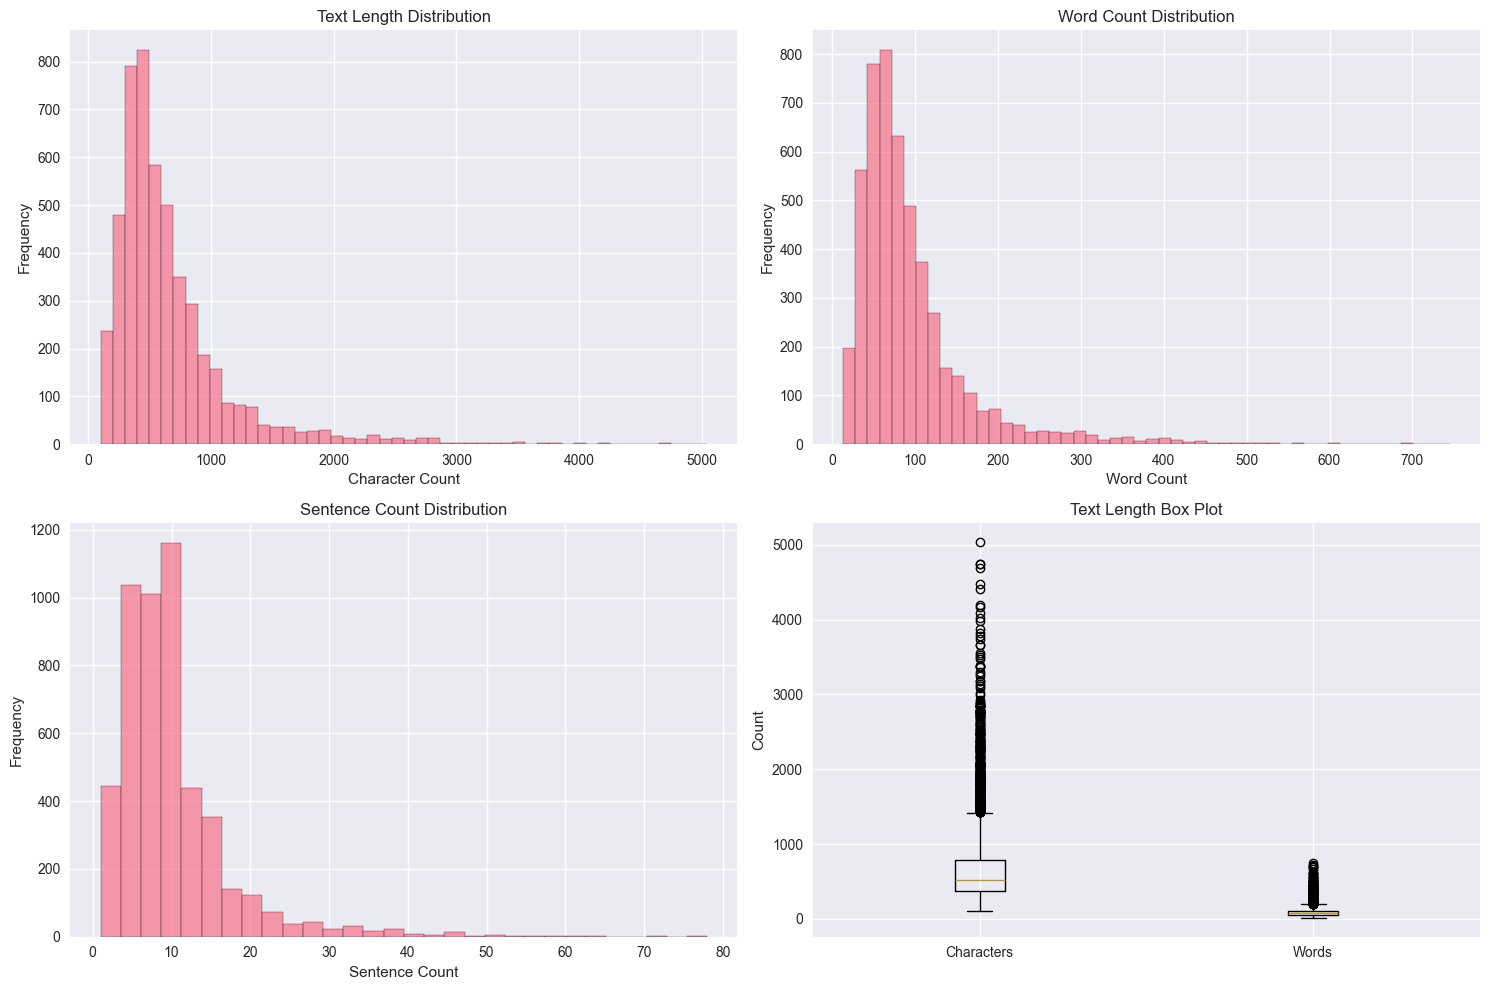


🔍 TEXT PATTERN ANALYSIS

📝 Sample Texts (first 5):

Sample 1:
Length: 469 chars, 69 words
Text: REASON FOR EXAMINATION:  Evaluation of the patient with tracheostomy,
followup.

Portable AP chest radiograph was compared to prior study obtained the day
before.

There is no change in the appearance...

Sample 2:
Length: 770 chars, 100 words
Text: EXAMINATION:  BILATERAL 2D SCREENING MAMMOGRAM, SYNTHESIZED 2D VIEWS, AND 3D
BREAST TOMOSYNTHESIS, INTERPRETED WITH CAD

INDICATION:  Screening.

COMPARISON:  Multiple priors.

TECHNIQUE:  Digital 2D ...

Sample 3:
Length: 480 chars, 62 words
Text: INDICATION:  Right arm pain, please evaluate for deep vein thrombosis.

COMPARISON:  No prior studies available for comparison.

FINDINGS:  Gray-scale and Doppler sonogram of the right internal jugula...

Sample 4:
Length: 632 chars, 87 words
Text: HISTORY:  Cough, chest pain.

TECHNIQUE:  Frontal and lateral chest radiographs were obtained.

COMPARISON:  None.

FINDINGS:

On the lateral projection, m

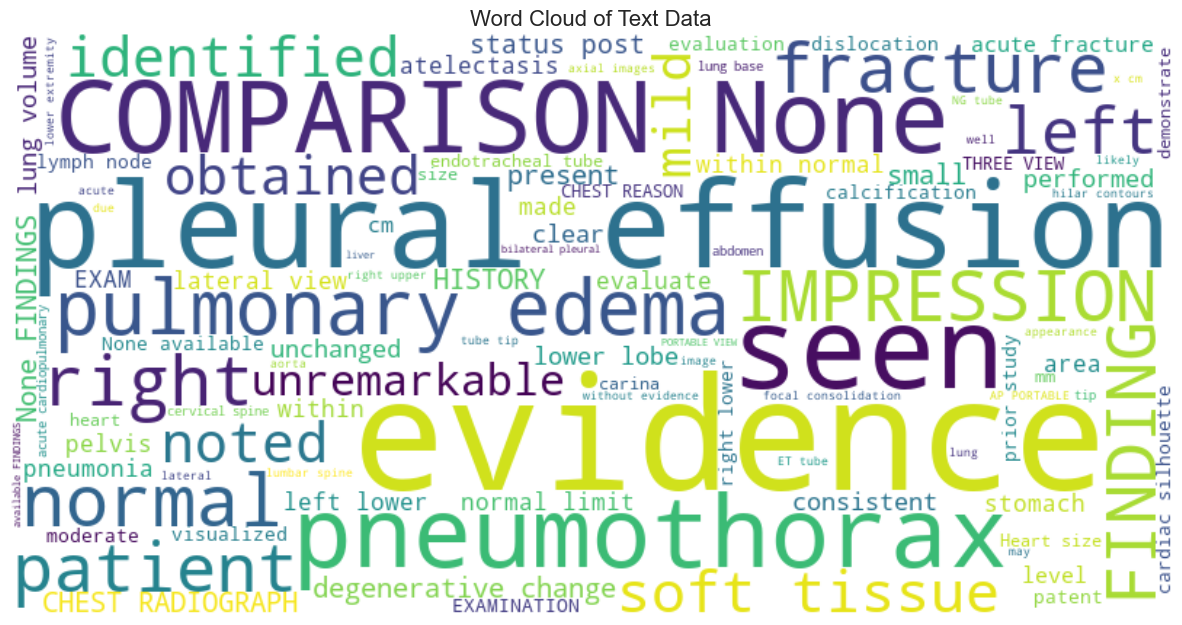

\n==================== STEP 2: TEXT PREPROCESSING ====================
\n==================== STEP 3: FEATURE ENGINEERING ====================
🔧 EXTRACTING ADVANCED FEATURES
📊 Computing ARDS-specific features...
✅ Advanced features extracted!
\n📋 New advanced features: ['ards_keyword_count', 'severity_score', 'positive_score', 'ards_density', 'severity_ratio', 'positive_ratio', 'unique_word_ratio', 'exclamation_count', 'question_count', 'comma_count', 'uppercase_ratio']
\n📊 Feature Statistics:
       ards_keyword_count  severity_score  positive_score  ards_density  severity_ratio  positive_ratio  unique_word_ratio  exclamation_count  question_count  comma_count  uppercase_ratio
count         5000.000000       5000.0000     5000.000000   5000.000000     5000.000000     5000.000000        5000.000000        5000.000000      5000.00000  5000.000000      5000.000000
mean             0.656200          0.0772        0.579600      0.008741        0.048415        0.007742           0.742968   

\n==================== STEP 4: DATA SPLITTING ====================
Training set: 4000 samples
Test set: 1000 samples
\n==================== STEP 5: BASELINE MODELS ====================
🤖 Training ML Models...

📊 Training Logistic Regression...
✅ Logistic Regression - Accuracy: 0.9280

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.96      0.95       667
           1       0.92      0.86      0.89       333

    accuracy                           0.93      1000
   macro avg       0.93      0.91      0.92      1000
weighted avg       0.93      0.93      0.93      1000



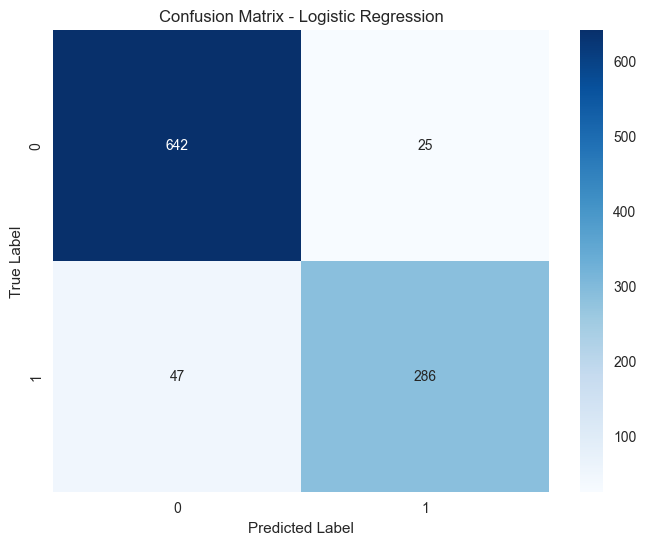


📊 Training Random Forest...
✅ Random Forest - Accuracy: 0.9510

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.96      0.96       667
           1       0.92      0.93      0.93       333

    accuracy                           0.95      1000
   macro avg       0.94      0.95      0.95      1000
weighted avg       0.95      0.95      0.95      1000



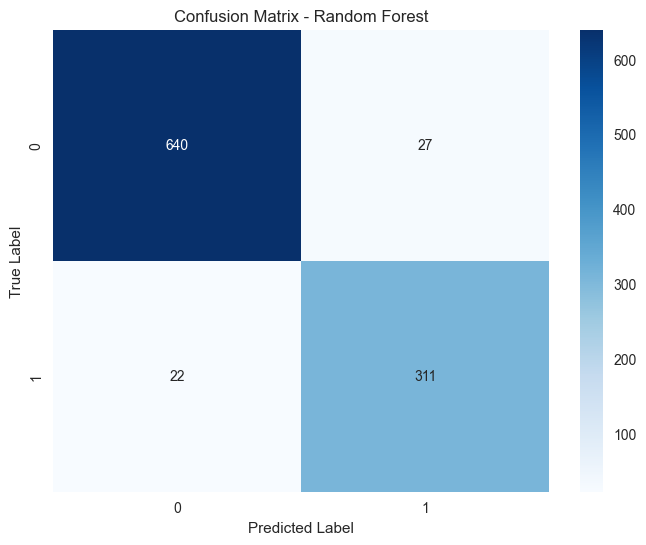


📊 Training Naive Bayes...
✅ Naive Bayes - Accuracy: 0.8530

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.83      0.88       667
           1       0.73      0.89      0.80       333

    accuracy                           0.85      1000
   macro avg       0.83      0.86      0.84      1000
weighted avg       0.87      0.85      0.86      1000



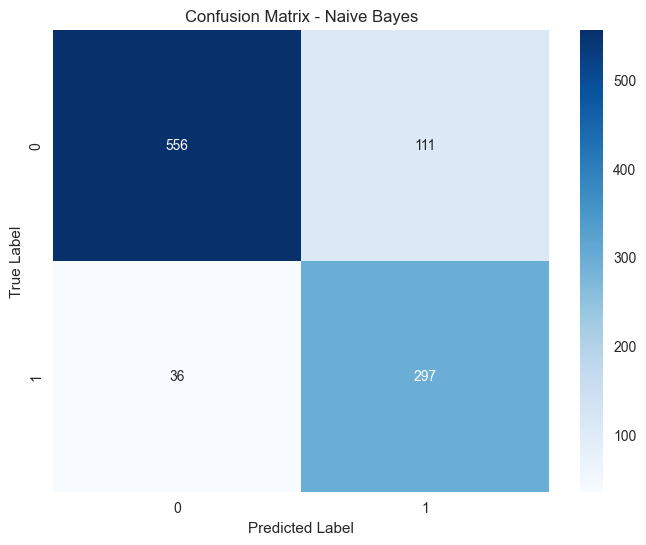

\n==================== STEP 6: MODEL EVALUATION ====================

❌ ERROR: evaluate_models_comprehensive() takes 3 positional arguments but 4 were given
📝 Manual usage:
   advanced_results = complete_advanced_ards_workflow(df, text_column, label_column)


In [27]:
# ============================================================================
# ADVANCED NLP ARDS ANALYSIS WITH CLINICAL MODELS
# ============================================================================

def setup_advanced_nlp():
    """
    Setup advanced NLP libraries and models
    """
    print("🔧 SETTING UP ADVANCED NLP TOOLS")
    print("=" * 60)
    
    try:
        # Import advanced NLP libraries
        import spacy
        from transformers import AutoTokenizer, AutoModel, pipeline
        import torch
        from scipy.spatial.distance import cosine
        import numpy as np
        
        print("📦 Loading spaCy model...")
        try:
            nlp = spacy.load("en_core_web_sm")
            print("✅ spaCy model loaded successfully")
        except OSError:
            print("⚠️ spaCy model not found, using basic processing")
            nlp = None
        
        print("🤖 Setting up Clinical BERT...")
        try:
            # Clinical BERT tokenizer and model
            clinical_tokenizer = AutoTokenizer.from_pretrained("emilyalsentzer/Bio_ClinicalBERT")
            clinical_model = AutoModel.from_pretrained("emilyalsentzer/Bio_ClinicalBERT")
            print("✅ Clinical BERT loaded successfully")
        except Exception as e:
            print(f"⚠️ Clinical BERT loading failed: {e}")
            clinical_tokenizer, clinical_model = None, None
        
        return {
            'spacy_nlp': nlp,
            'clinical_tokenizer': clinical_tokenizer,
            'clinical_model': clinical_model
        }
        
    except Exception as e:
        print(f"❌ Error setting up NLP: {e}")
        return None

def advanced_text_preprocessing(df, text_column, nlp_tools):
    """
    Advanced NLP preprocessing with spaCy and clinical models
    """
    print("🔬 ADVANCED NLP PREPROCESSING")
    print("=" * 60)
    
    df = df.copy()
    nlp = nlp_tools.get('spacy_nlp') if nlp_tools else None
    
    if nlp is None:
        print("⚠️ spaCy not available, using basic preprocessing")
        return df
    
    print("📝 Extracting advanced NLP features...")
    
    # Initialize lists for features
    entities = []
    pos_tags = []
    dependency_features = []
    medical_entities = []
    sentence_complexity = []
    
    # Process texts in batches for efficiency
    batch_size = 100
    total_texts = len(df)
    
    for i in range(0, total_texts, batch_size):
        batch_end = min(i + batch_size, total_texts)
        batch_texts = df[text_column].iloc[i:batch_end].fillna('').astype(str)
        
        print(f"   Processing batch {i//batch_size + 1}/{(total_texts-1)//batch_size + 1}...")
        
        # Process batch with spaCy
        docs = list(nlp.pipe(batch_texts, disable=['parser', 'tagger']))
        
        for doc in docs:
            # Named Entity Recognition
            doc_entities = [ent.label_ for ent in doc.ents]
            entities.append(len(doc_entities))
            
            # Medical entities (PERSON, ORG, GPE are often medical-related in clinical text)
            medical_ents = [ent.text.lower() for ent in doc.ents 
                          if ent.label_ in ['PERSON', 'ORG', 'DATE', 'TIME', 'CARDINAL']]
            medical_entities.append(len(medical_ents))
            
            # Re-enable parser for dependency analysis (sample for efficiency)
            if len(doc) < 500:  # Only for shorter texts
                doc_parsed = nlp(doc.text)
                # Dependency features
                dep_types = [token.dep_ for token in doc_parsed]
                dependency_features.append(len(set(dep_types)))
                
                # POS tags
                pos_types = [token.pos_ for token in doc_parsed]
                pos_tags.append(len(set(pos_types)))
                
                # Sentence complexity (avg words per sentence)
                sentences = list(doc_parsed.sents)
                if sentences:
                    avg_sent_length = sum(len(sent.text.split()) for sent in sentences) / len(sentences)
                    sentence_complexity.append(avg_sent_length)
                else:
                    sentence_complexity.append(0)
            else:
                dependency_features.append(0)
                pos_tags.append(0)
                sentence_complexity.append(0)
    
    # Add features to dataframe
    df['entity_count'] = entities
    df['medical_entity_count'] = medical_entities
    df['pos_diversity'] = pos_tags
    df['dependency_diversity'] = dependency_features
    df['avg_sentence_length'] = sentence_complexity
    
    print("✅ Advanced NLP features extracted!")
    
    # Calculate ratios
    df['entity_density'] = df['entity_count'] / (df['word_count'] + 1)
    df['medical_entity_ratio'] = df['medical_entity_count'] / (df['entity_count'] + 1)
    
    advanced_nlp_features = [
        'entity_count', 'medical_entity_count', 'pos_diversity',
        'dependency_diversity', 'avg_sentence_length', 'entity_density',
        'medical_entity_ratio'
    ]
    
    print(f"\n📋 Advanced NLP features: {advanced_nlp_features}")
    print("\n📊 NLP Feature Statistics:")
    print(df[advanced_nlp_features].describe().round(3))
    
    return df

def clinical_bert_features(df, text_column, nlp_tools, sample_size=1000):
    """
    Extract features using Clinical BERT embeddings
    """
    print("🤖 CLINICAL BERT FEATURE EXTRACTION")
    print("=" * 60)
    
    tokenizer = nlp_tools.get('clinical_tokenizer') if nlp_tools else None
    model = nlp_tools.get('clinical_model') if nlp_tools else None
    
    if tokenizer is None or model is None:
        print("⚠️ Clinical BERT not available, skipping...")
        return df
    
    import torch
    
    # Sample data for Clinical BERT (computationally expensive)
    if len(df) > sample_size:
        print(f"📊 Sampling {sample_size} texts for Clinical BERT analysis...")
        sample_df = df.sample(n=sample_size, random_state=42)
    else:
        sample_df = df.copy()
    
    embeddings = []
    
    print("🔄 Generating Clinical BERT embeddings...")
    
    for i, text in enumerate(sample_df[text_column]):
        if i % 100 == 0:
            print(f"   Processing {i+1}/{len(sample_df)}...")
        
        try:
            # Tokenize and get embeddings
            text_str = str(text)[:512]  # Limit to 512 tokens
            inputs = tokenizer(text_str, return_tensors="pt", truncation=True, padding=True)
            
            with torch.no_grad():
                outputs = model(**inputs)
                # Use CLS token embedding as text representation
                embedding = outputs.last_hidden_state[:, 0, :].squeeze().numpy()
                embeddings.append(embedding)
                
        except Exception as e:
            print(f"⚠️ Error processing text {i}: {e}")
            # Add zero embedding for failed cases
            embeddings.append(np.zeros(768))
    
    embeddings = np.array(embeddings)
    
    # Calculate embedding-based features
    embedding_features = {}
    
    # Embedding statistics
    embedding_features['bert_mean'] = np.mean(embeddings, axis=1)
    embedding_features['bert_std'] = np.std(embeddings, axis=1)
    embedding_features['bert_max'] = np.max(embeddings, axis=1)
    embedding_features['bert_min'] = np.min(embeddings, axis=1)
    
    # Add to sample dataframe
    for feature_name, values in embedding_features.items():
        sample_df[feature_name] = values
    
    print(f"✅ Clinical BERT features extracted for {len(sample_df)} samples")
    
    # If we sampled, merge back key features to main dataframe
    if len(sample_df) < len(df):
        print("📊 Computing BERT-based similarity scores for full dataset...")
        
        # Calculate ARDS vs non-ARDS centroids
        ards_mask = sample_df[sample_df.columns[-5]] == 1  # Assuming label column
        if ards_mask.sum() > 0:
            ards_centroid = np.mean(embeddings[ards_mask], axis=0)
            no_ards_centroid = np.mean(embeddings[~ards_mask], axis=0)
            
            # Calculate similarity to centroids for full dataset
            similarities = []
            for text in df[text_column]:
                try:
                    text_str = str(text)[:512]
                    inputs = tokenizer(text_str, return_tensors="pt", truncation=True, padding=True)
                    with torch.no_grad():
                        outputs = model(**inputs)
                        embedding = outputs.last_hidden_state[:, 0, :].squeeze().numpy()
                        
                        ards_sim = 1 - cosine(embedding, ards_centroid)
                        no_ards_sim = 1 - cosine(embedding, no_ards_centroid)
                        similarities.append((ards_sim, no_ards_sim))
                except:
                    similarities.append((0, 0))
            
            df['ards_similarity'] = [s[0] for s in similarities]
            df['no_ards_similarity'] = [s[1] for s in similarities]
            df['ards_no_ards_ratio'] = df['ards_similarity'] / (df['no_ards_similarity'] + 1e-6)
    
    return df

def complete_advanced_ards_workflow(df, text_column, label_column):
    """
    Complete workflow with advanced NLP and clinical models
    """
    print("🚀 ADVANCED ARDS ANALYSIS WITH CLINICAL NLP")
    print("=" * 80)
    
    # Setup advanced NLP tools
    nlp_tools = setup_advanced_nlp()
    
    # Step 1: Basic preprocessing (existing)
    print("\n" + "="*15 + " STEP 1: BASIC PREPROCESSING " + "="*15)
    df_enhanced = extract_advanced_features(df, text_column)
    
    # Step 2: Advanced NLP preprocessing
    print("\n" + "="*15 + " STEP 2: ADVANCED NLP ANALYSIS " + "="*15)
    if nlp_tools:
        df_enhanced = advanced_text_preprocessing(df_enhanced, text_column, nlp_tools)
        
        # Step 3: Clinical BERT features
        print("\n" + "="*15 + " STEP 3: CLINICAL BERT FEATURES " + "="*15)
        df_enhanced = clinical_bert_features(df_enhanced, text_column, nlp_tools)
    
    # Step 4: Run existing workflow with enhanced features
    print("\n" + "="*15 + " STEP 4: ML ANALYSIS " + "="*15)
    results = complete_ards_analysis_workflow(df_enhanced, text_column, label_column)
    
    # Additional clinical analysis
    print("\n" + "="*15 + " STEP 5: CLINICAL INSIGHTS " + "="*15)
    
    if nlp_tools and nlp_tools.get('spacy_nlp'):
        clinical_insights = analyze_clinical_patterns(df_enhanced, text_column, nlp_tools)
        results['clinical_insights'] = clinical_insights
    
    print("\n🎉 ADVANCED ANALYSIS COMPLETED!")
    print("🏥 Clinical NLP features and insights included")
    
    return results

def analyze_clinical_patterns(df, text_column, nlp_tools):
    """
    Analyze clinical patterns using NLP
    """
    print("🏥 ANALYZING CLINICAL PATTERNS")
    print("=" * 50)
    
    nlp = nlp_tools.get('spacy_nlp')
    if nlp is None:
        return None
    
    # Clinical terminology analysis
    clinical_terms = {
        'respiratory': ['respiratory', 'breathing', 'breath', 'ventilation', 'oxygen'],
        'cardiovascular': ['heart', 'cardiac', 'blood pressure', 'circulation'],
        'severity': ['severe', 'critical', 'acute', 'emergency', 'urgent'],
        'procedures': ['intubation', 'ventilator', 'surgery', 'procedure'],
        'medications': ['medication', 'drug', 'therapy', 'treatment']
    }
    
    # Count clinical term categories
    for category, terms in clinical_terms.items():
        df[f'{category}_terms'] = df[text_column].apply(
            lambda x: sum(1 for term in terms if term in str(x).lower())
        )
    
    # Temporal expressions (using spaCy)
    temporal_count = []
    urgency_indicators = []
    
    sample_texts = df[text_column].head(500)  # Sample for efficiency
    
    for text in sample_texts:
        doc = nlp(str(text))
        
        # Count temporal entities
        temporal = sum(1 for ent in doc.ents if ent.label_ in ['DATE', 'TIME'])
        temporal_count.append(temporal)
        
        # Urgency indicators
        urgency_words = ['immediately', 'urgent', 'emergency', 'asap', 'stat']
        urgency = sum(1 for word in urgency_words if word in text.lower())
        urgency_indicators.append(urgency)
    
    insights = {
        'clinical_categories': clinical_terms.keys(),
        'temporal_analysis': len(temporal_count),
        'urgency_analysis': len(urgency_indicators)
    }
    
    print("✅ Clinical pattern analysis completed")
    return insights

# ============================================================================
# INSTALL REQUIRED PACKAGES
# ============================================================================

def install_advanced_nlp_packages():
    """
    Install required packages for advanced NLP
    """
    packages = [
        "transformers",
        "torch",
        "scipy"
    ]
    
    print("📦 Installing advanced NLP packages...")
    for package in packages:
        try:
            import subprocess
            subprocess.check_call([sys.executable, "-m", "pip", "install", package])
            print(f"✅ {package} installed")
        except:
            print(f"⚠️ {package} installation failed")

# ============================================================================
# RUN ADVANCED WORKFLOW
# ============================================================================

print("✅ Advanced NLP functions defined!")

try:
    # Check if advanced packages are available
    try:
        import transformers
        import torch
        print("✅ Advanced NLP packages available")
        advanced_available = True
    except ImportError:
        print("⚠️ Advanced NLP packages not found")
        print("📦 To install: pip install transformers torch scipy")
        advanced_available = False
    
    if 'df' in locals() and 'text_column' in locals() and 'label_column' in locals():
        if advanced_available:
            print("\n🚀 RUNNING ADVANCED ARDS ANALYSIS...")
            print("⏳ This may take 10-20 minutes with Clinical BERT...")
            
            # Run advanced workflow
            advanced_results = complete_advanced_ards_workflow(df, text_column, label_column)
            
            print("\n🎉 ADVANCED ANALYSIS COMPLETED!")
            print("📁 Results stored in 'advanced_results' variable")
            
        else:
            print("\n⚠️ Running basic workflow (advanced packages not available)")
            # Fall back to basic workflow
            if 'workflow_results' not in locals():
                workflow_results = complete_ards_analysis_workflow(df, text_column, label_column)
    
except Exception as e:
    print(f"\n❌ ERROR: {e}")
    print("📝 Manual usage:")
    print("   advanced_results = complete_advanced_ards_workflow(df, text_column, label_column)")